# Compare vaccination strategies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']

strategies = [
    ('equal', EPIDEMIC['ws_vacc'], 'Pop only'),
    ('no_vacc', EPIDEMIC['ws_vacc'], 'No vaccination'),
    ('thl', EPIDEMIC['ws_vacc'], 'Pop, Inf and Hosp'),
    ('thl', [1/2, 1/2, 0], 'Pop and Hosp'),
    ('thl', [1/2, 0, 1/2], 'Pop and Inf'),
    ('thl', [0, 1/2, 1/2], 'Hosp and Inf'),
    ('thl', [0, 1, 0], 'Hosp only'),
    ('thl', [0, 0, 1], 'Inf only'),
]

In [3]:
all_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=True,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0)

Finished R: 1.0. 1/4. Policy: Pop only. 1/8
Finished R: 1.0. 1/4. Policy: No vaccination. 2/8
Finished R: 1.0. 1/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.0. 1/4. Policy: Pop and Hosp. 4/8
Finished R: 1.0. 1/4. Policy: Pop and Inf. 5/8
Finished R: 1.0. 1/4. Policy: Hosp and Inf. 6/8
Finished R: 1.0. 1/4. Policy: Hosp only. 7/8
Finished R: 1.0. 1/4. Policy: Inf only. 8/8
Finished R: 1.25. 2/4. Policy: Pop only. 1/8
Finished R: 1.25. 2/4. Policy: No vaccination. 2/8
Finished R: 1.25. 2/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.25. 2/4. Policy: Pop and Hosp. 4/8
Finished R: 1.25. 2/4. Policy: Pop and Inf. 5/8
Finished R: 1.25. 2/4. Policy: Hosp and Inf. 6/8
Finished R: 1.25. 2/4. Policy: Hosp only. 7/8
Finished R: 1.25. 2/4. Policy: Inf only. 8/8
Finished R: 1.5. 3/4. Policy: Pop only. 1/8
Finished R: 1.5. 3/4. Policy: No vaccination. 2/8
Finished R: 1.5. 3/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.5. 3/4. Policy: Pop and Hosp. 4/8
Finished R: 1.5. 3/4. Policy: Pop and I

In [4]:
def plot_results(ax, r, metric, all_results, t0, T, skip_no_vacc=True):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]

    results_for_r = all_results[r]
    totals = []
    for label, results_all_metrics in results_for_r:
        if label == 'No vaccination' and skip_no_vacc:
            continue
        metric_results = results_all_metrics[metric]
        metric_all_time = metric_results.sum(axis=0)
        metric_all_time = metric_all_time.sum(axis=0)
        
        assert metric_all_time.shape[0] == T
        
        ax.plot(x, metric_all_time, label=label)
        if metric == 'deaths':
            total_policy = metric_all_time[-1]
        else:
            total_policy = metric_all_time.sum(axis=0)
        total = (label, total_policy)
        totals.append(total)
        
    sorted_totals = sorted(totals, key=lambda x: x[-1])
    for total in sorted_totals:
        print('%s: %s' % (total[0], total[1]))
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s.' % (metric, ))
    ax.set_title('Number of %s per policy. R=%s' % (metric, r))
    ax.legend()
        
    return ax

# Deaths

Pop and Inf: 86.94709211845125
Pop and Hosp: 86.9686816120288
Pop, Inf and Hosp: 86.98365608278617
Pop only: 87.0134430452045
Hosp and Inf: 87.13991633437237
Inf only: 87.1429409489219
Hosp only: 87.17454661108637


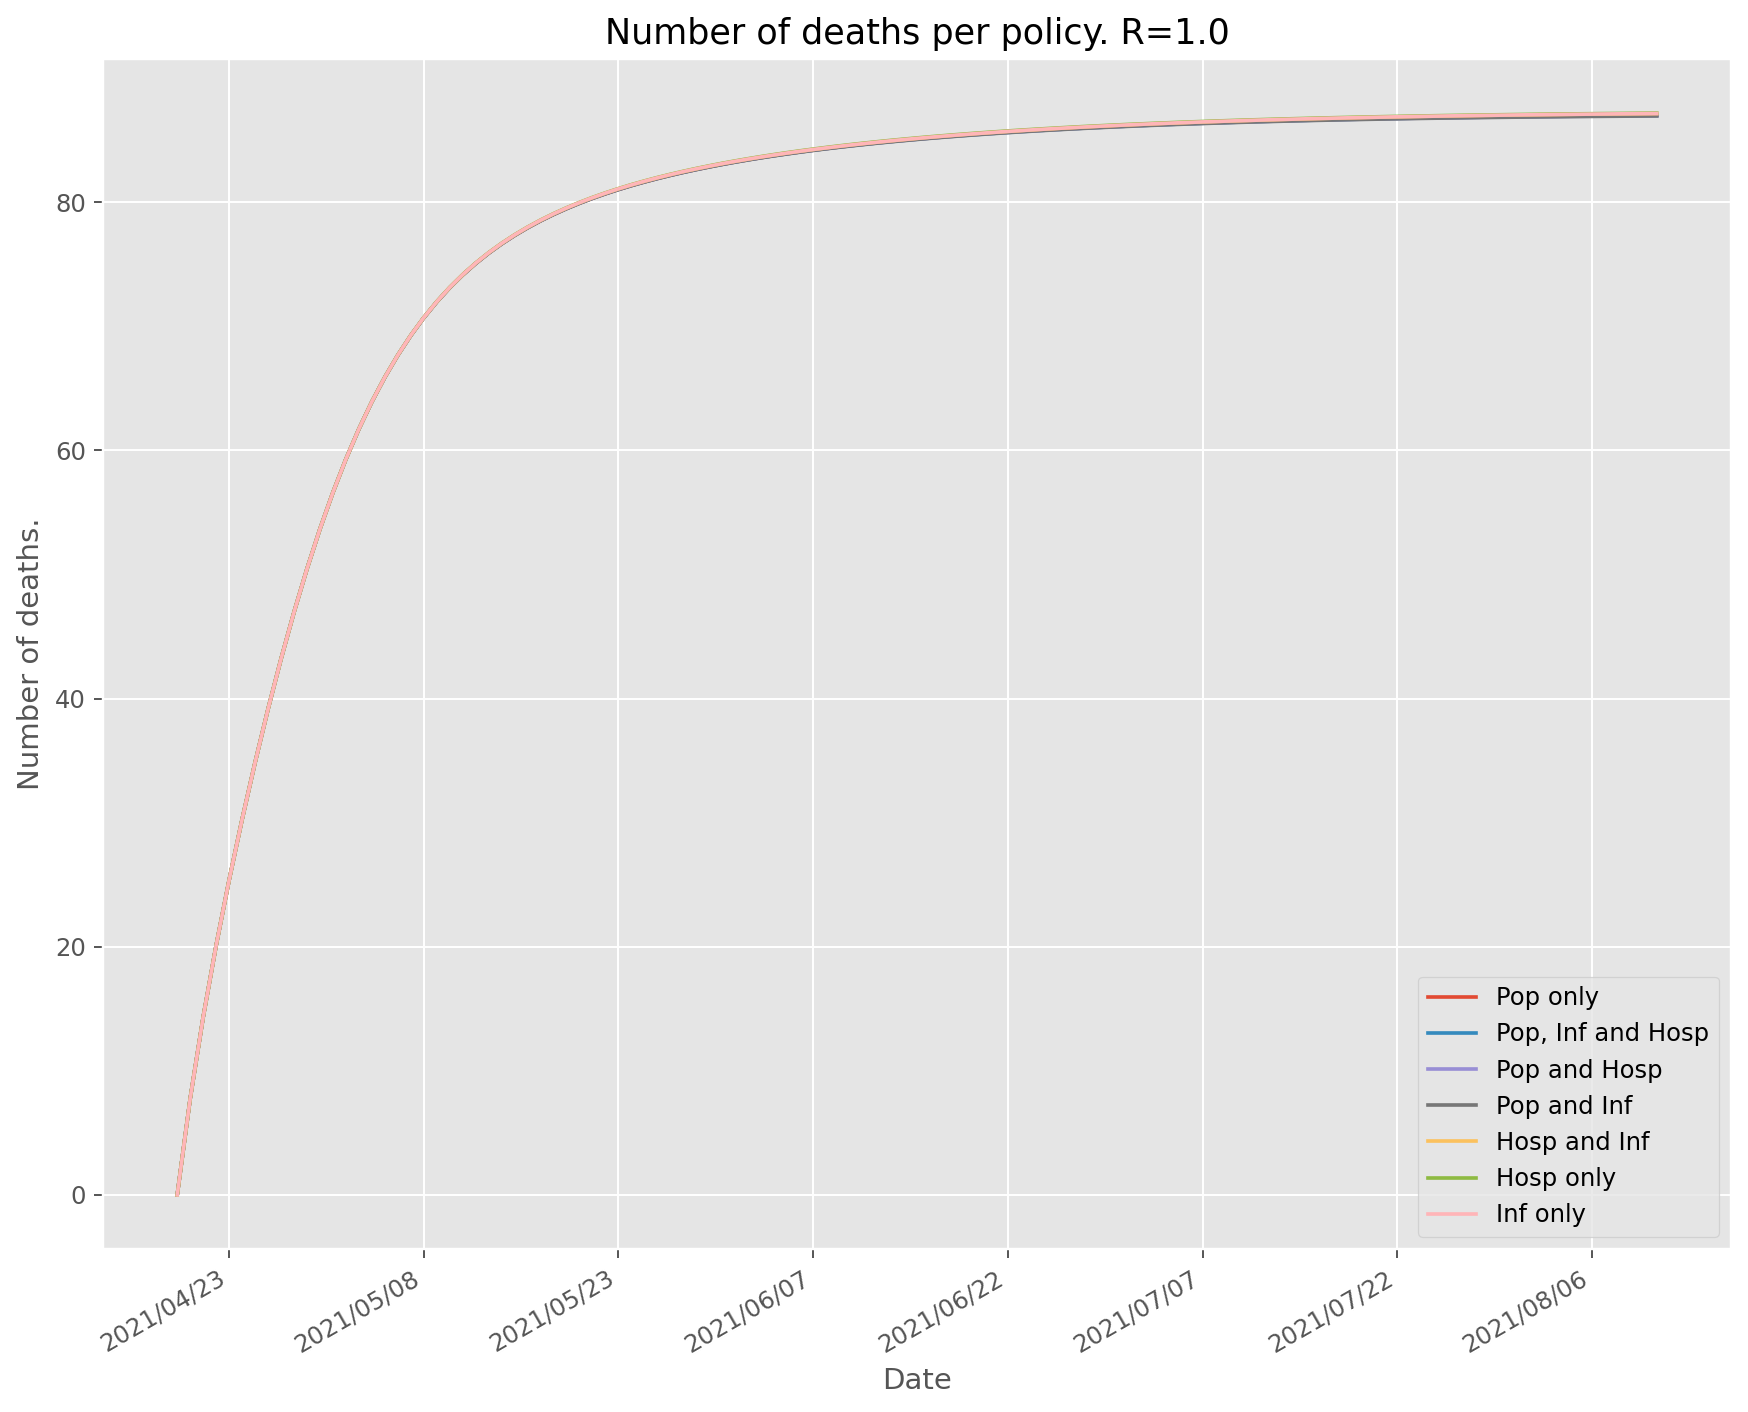

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 107.92750174299546
Pop only: 107.93301654122259
Pop and Hosp: 107.99397226230641
Pop, Inf and Hosp: 108.21482772889006
Hosp and Inf: 109.18780872252121
Inf only: 109.23619409170541
Hosp only: 109.24471641051827


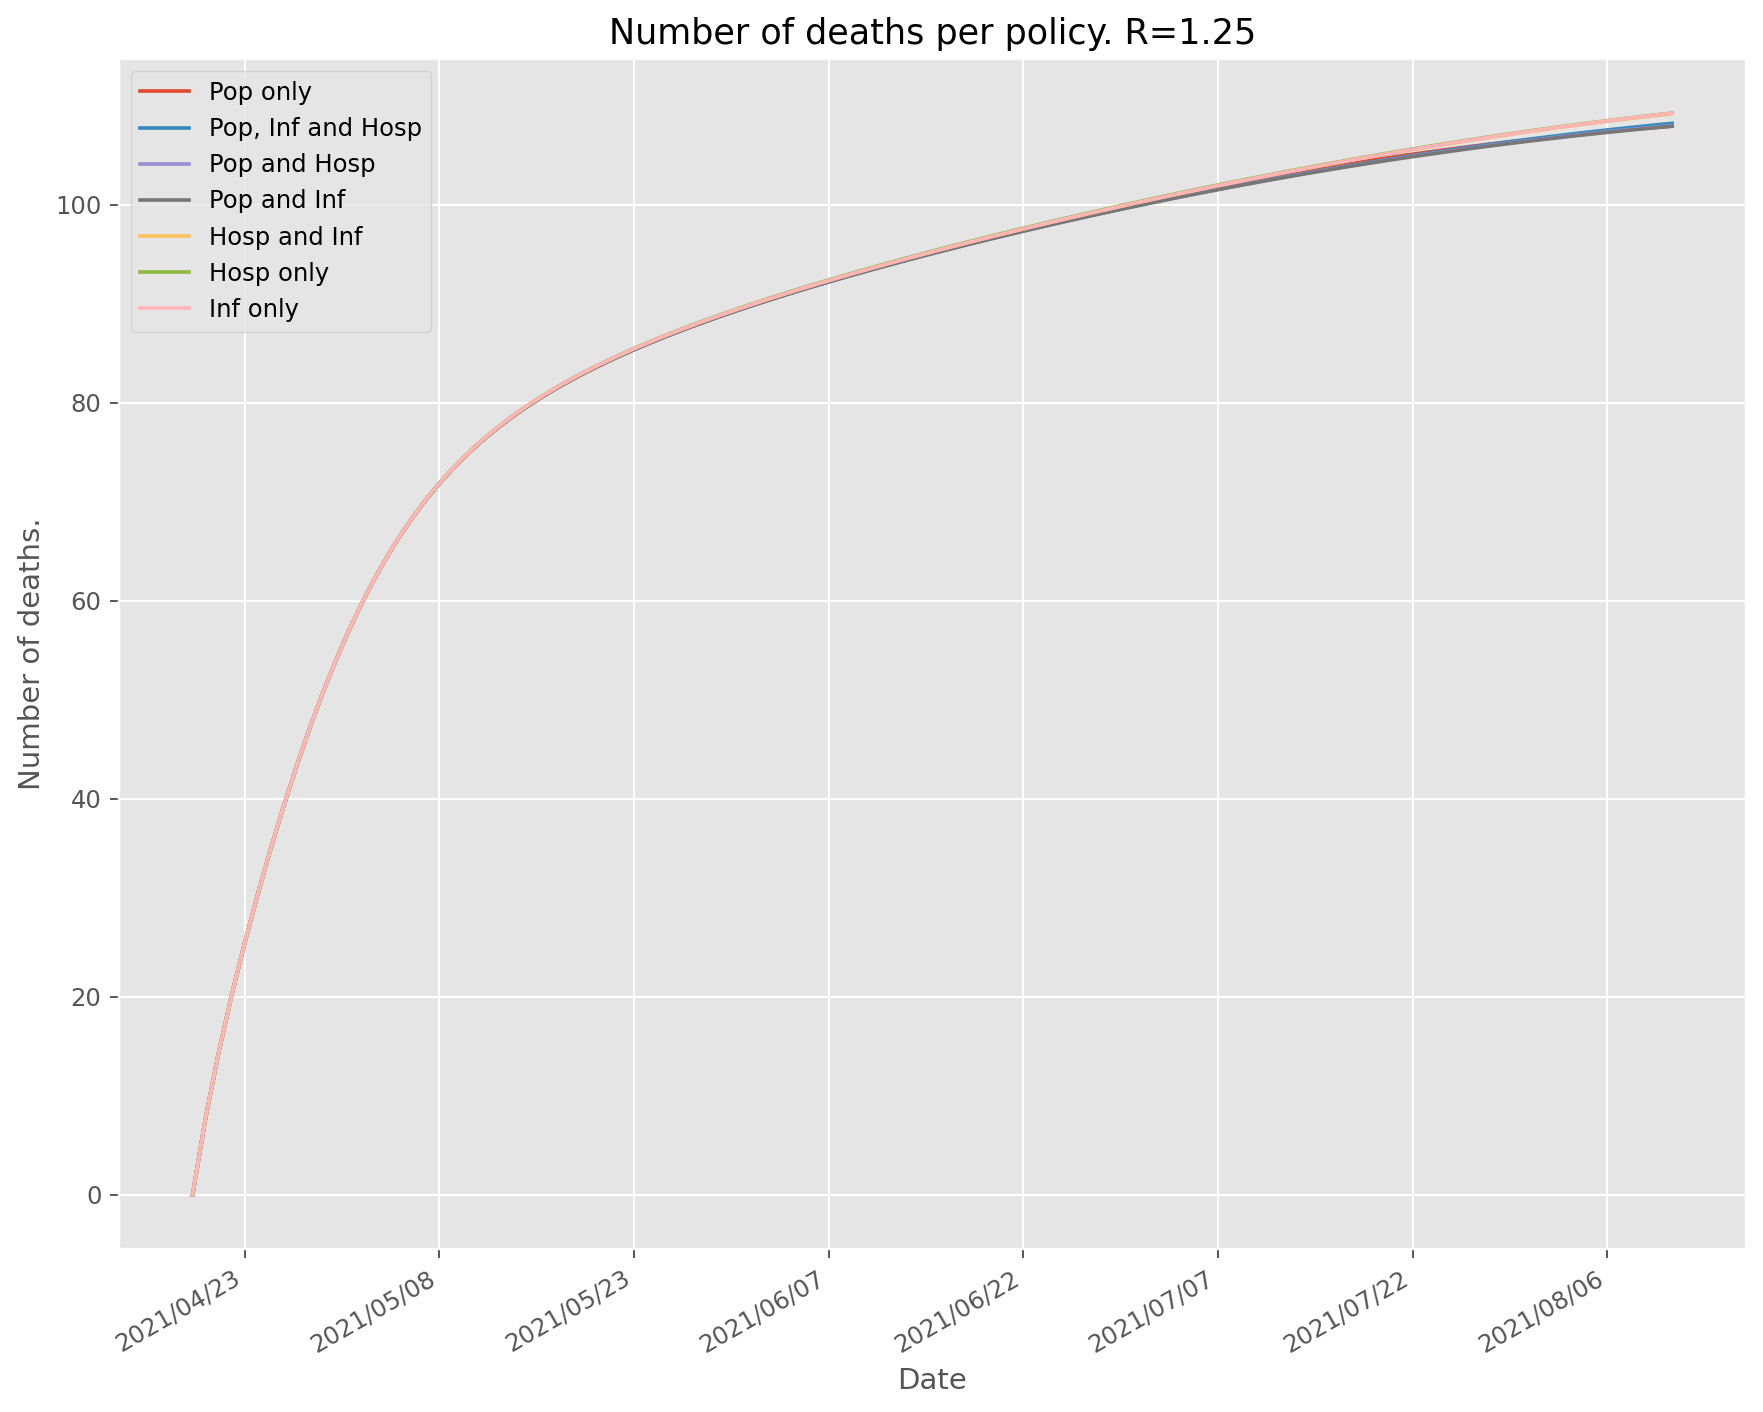

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 176.59627875092815
Pop and Inf: 179.24742112165097
Pop and Hosp: 179.52759433876403
Pop, Inf and Hosp: 181.27964758052948
Hosp only: 186.74106276130846
Hosp and Inf: 186.75436544291748
Inf only: 187.09936750642606


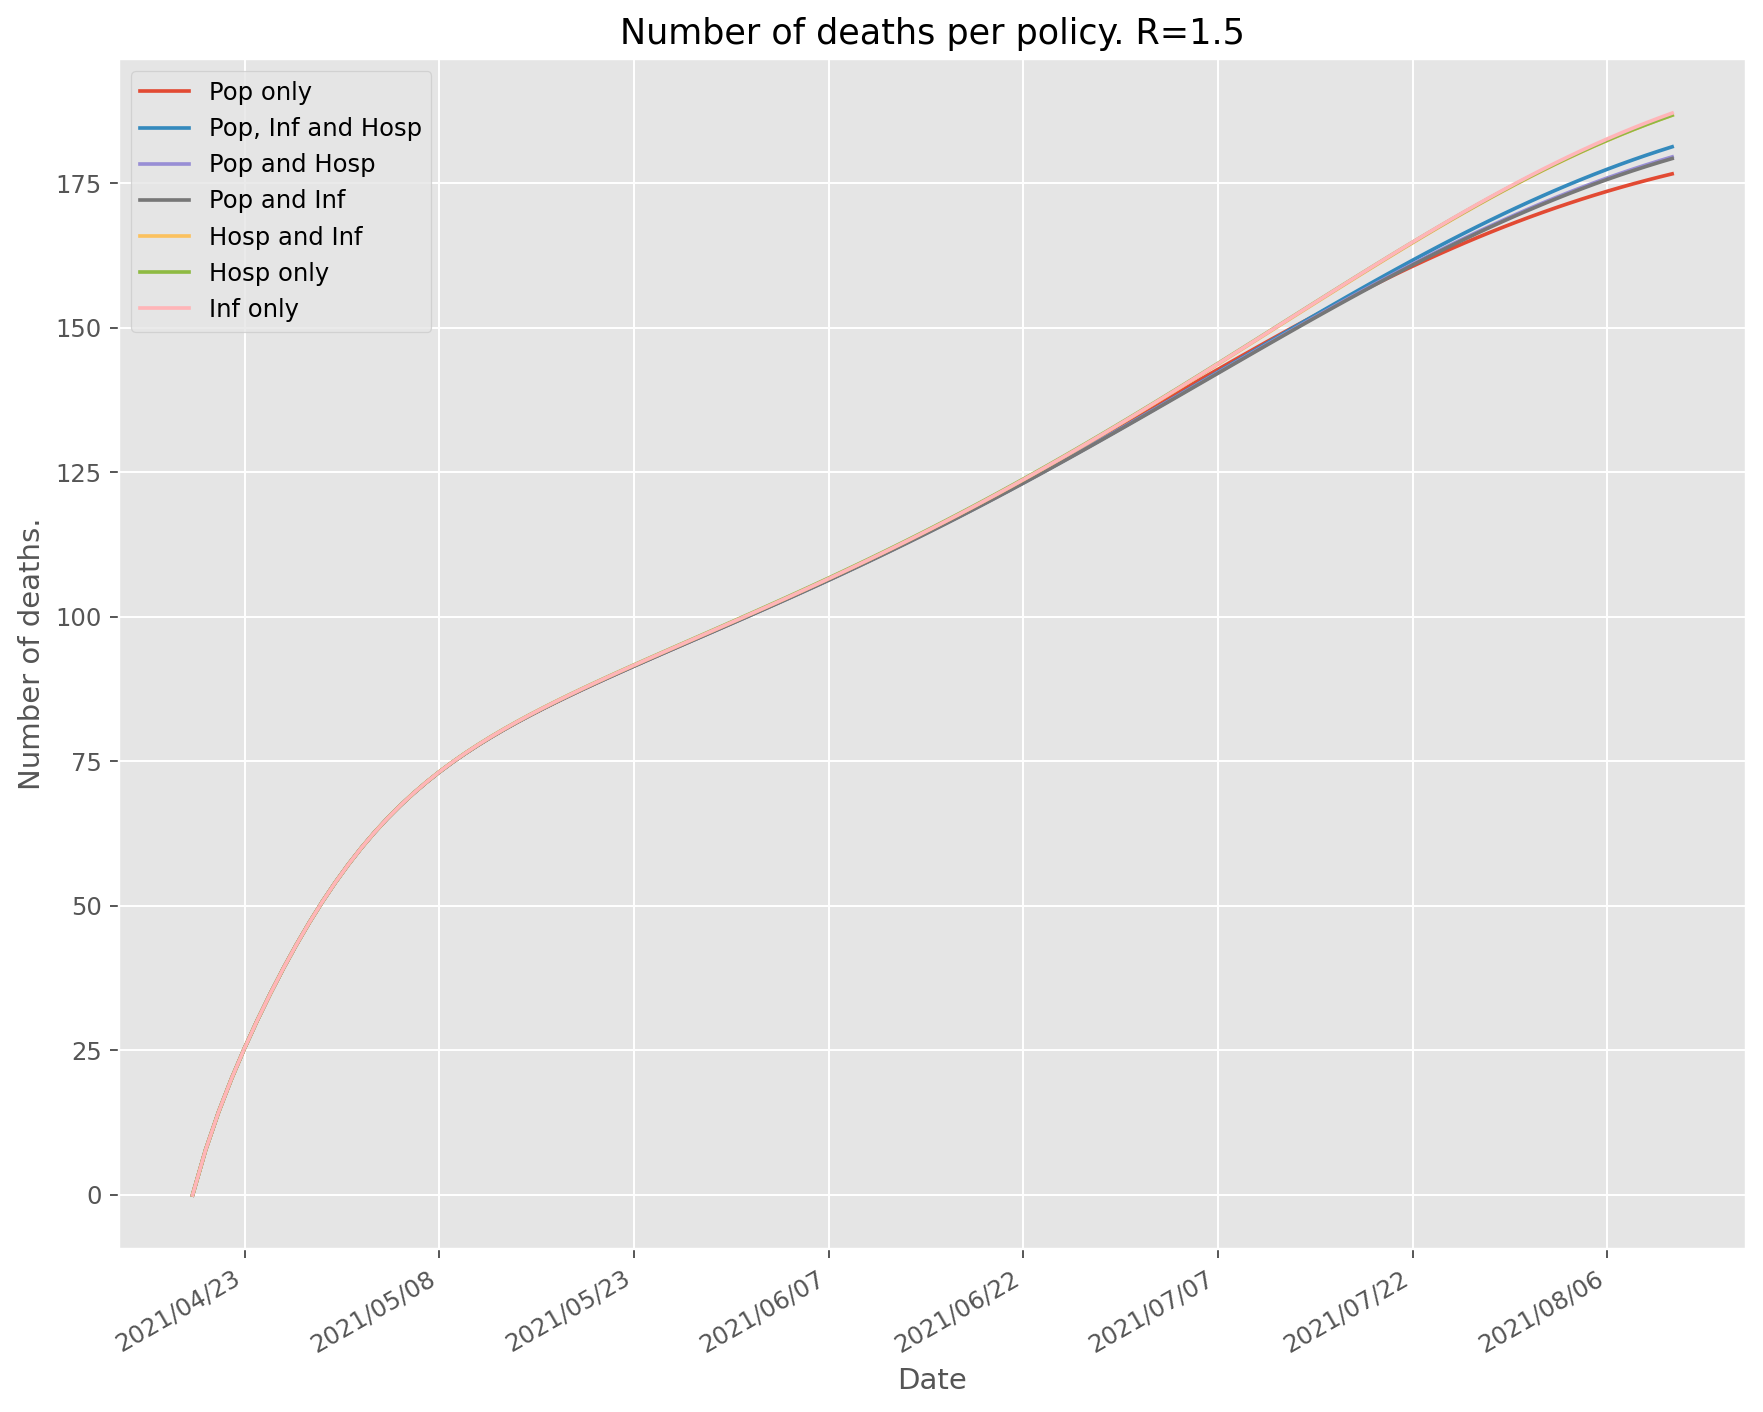

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 496.59421650098784
Pop and Inf: 513.056624180515
Pop and Hosp: 514.2816693558046
Pop, Inf and Hosp: 522.0038256428024
Hosp only: 547.7743890782638
Hosp and Inf: 547.8205701981391
Inf only: 548.8690722888034


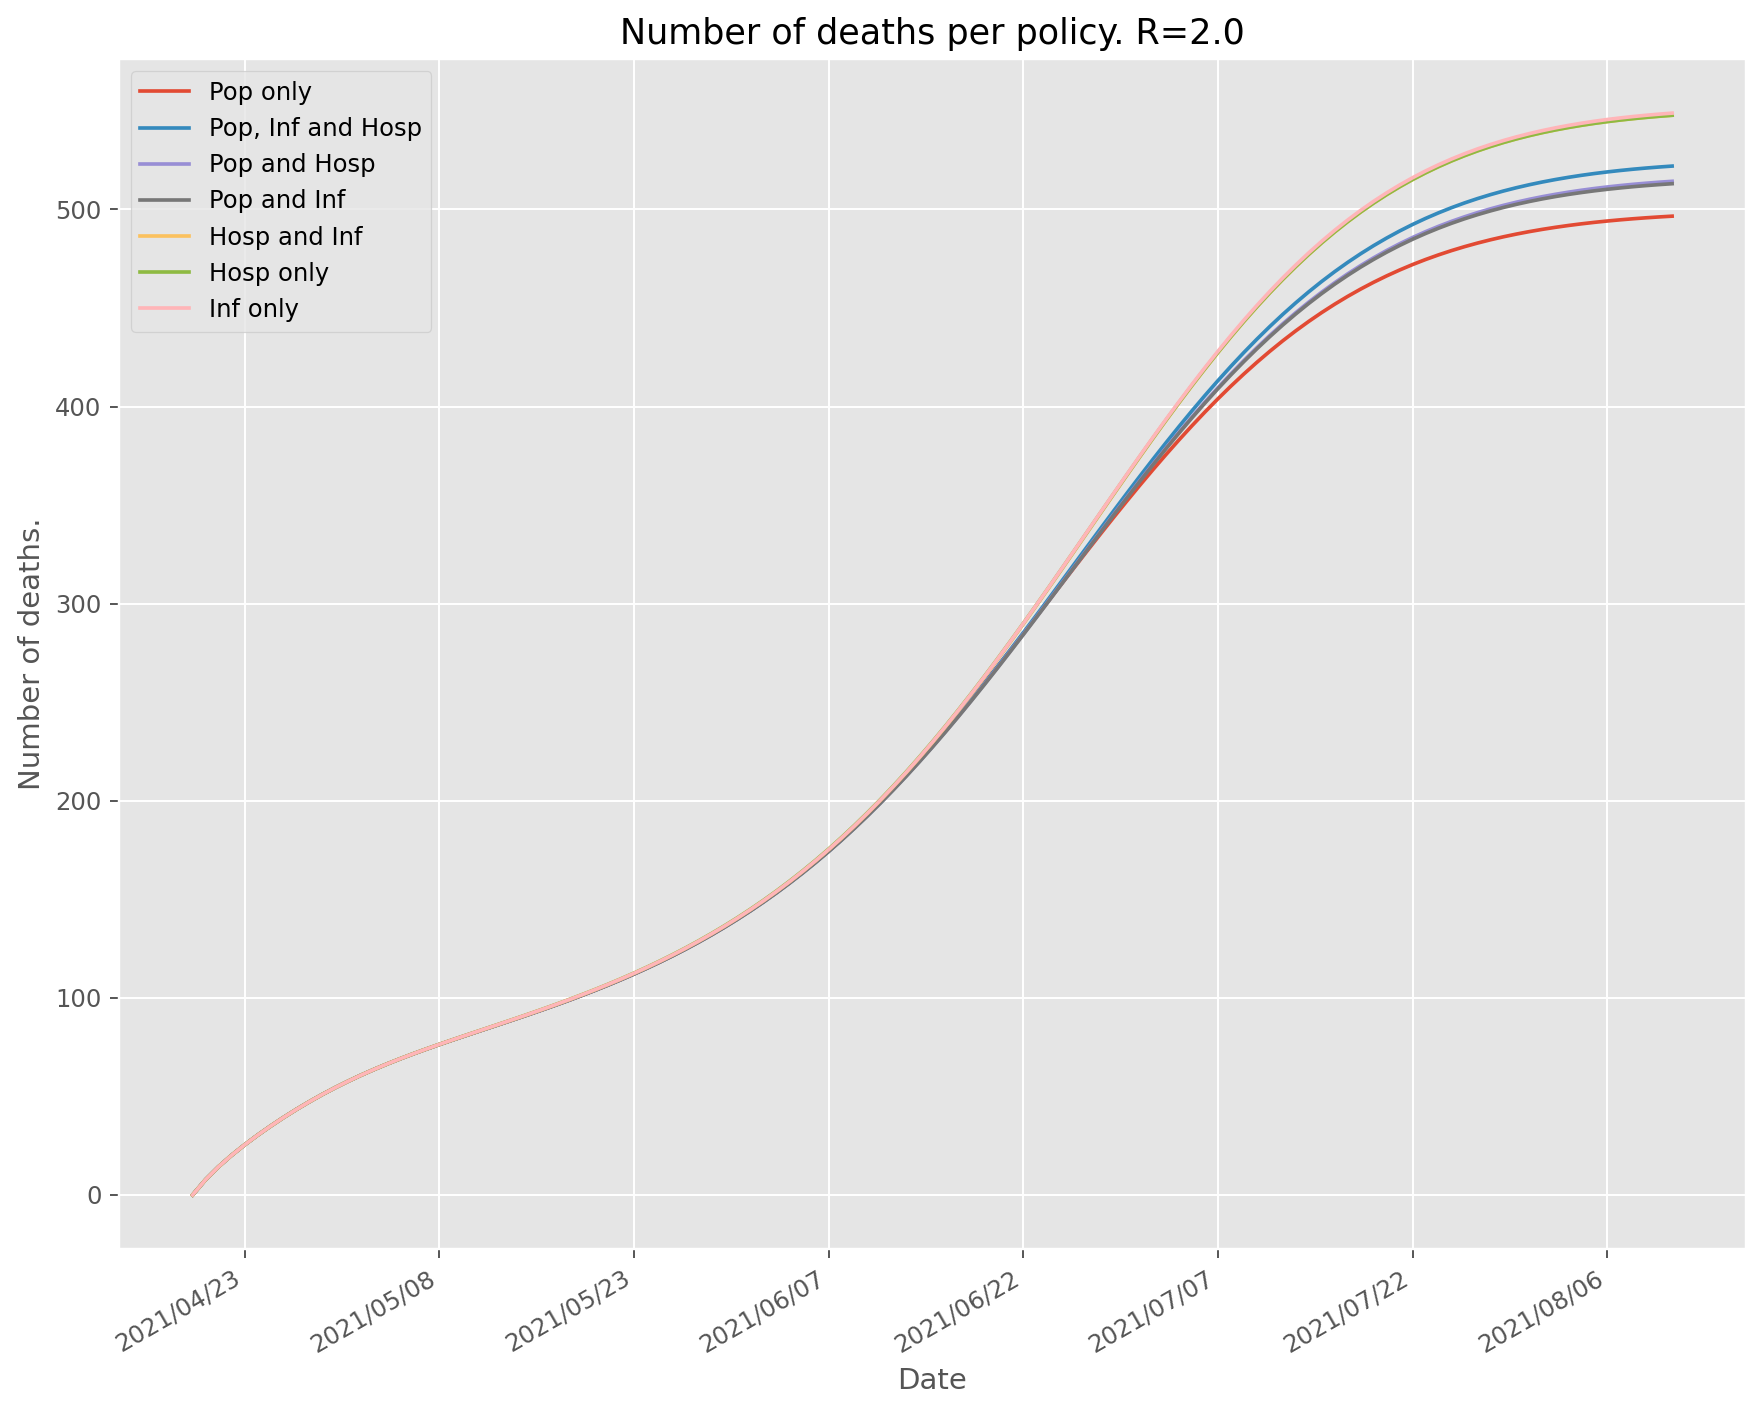

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Death incidence

Pop and Inf: 86.94709211845125
Pop and Hosp: 86.9686816120288
Pop, Inf and Hosp: 86.98365608278618
Pop only: 87.01344304520453
Hosp and Inf: 87.13991633437237
Inf only: 87.14294094892189
Hosp only: 87.17454661108636


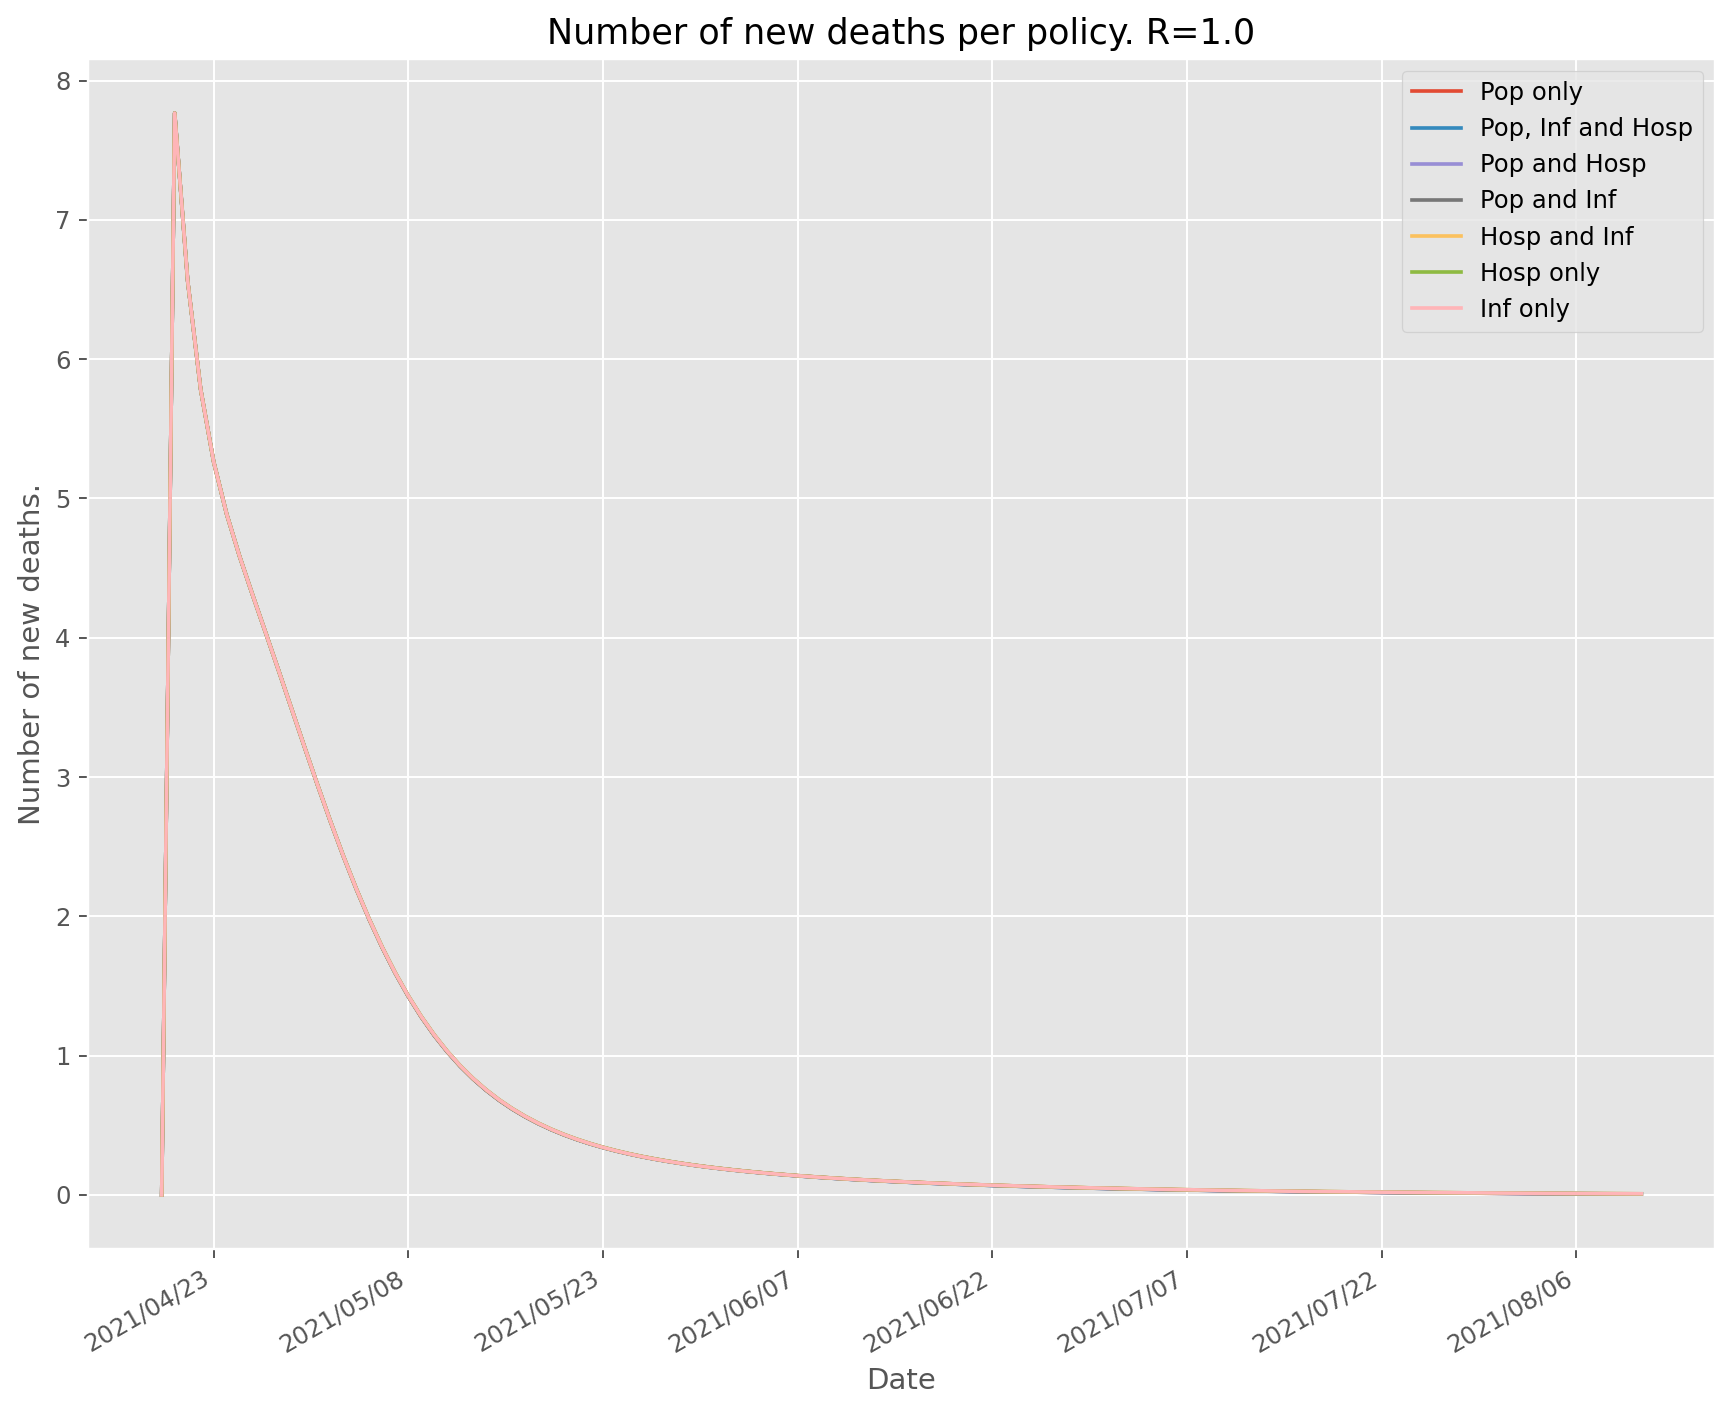

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 107.92750174299545
Pop only: 107.93301654122259
Pop and Hosp: 107.99397226230641
Pop, Inf and Hosp: 108.21482772889004
Hosp and Inf: 109.18780872252123
Inf only: 109.23619409170541
Hosp only: 109.24471641051825


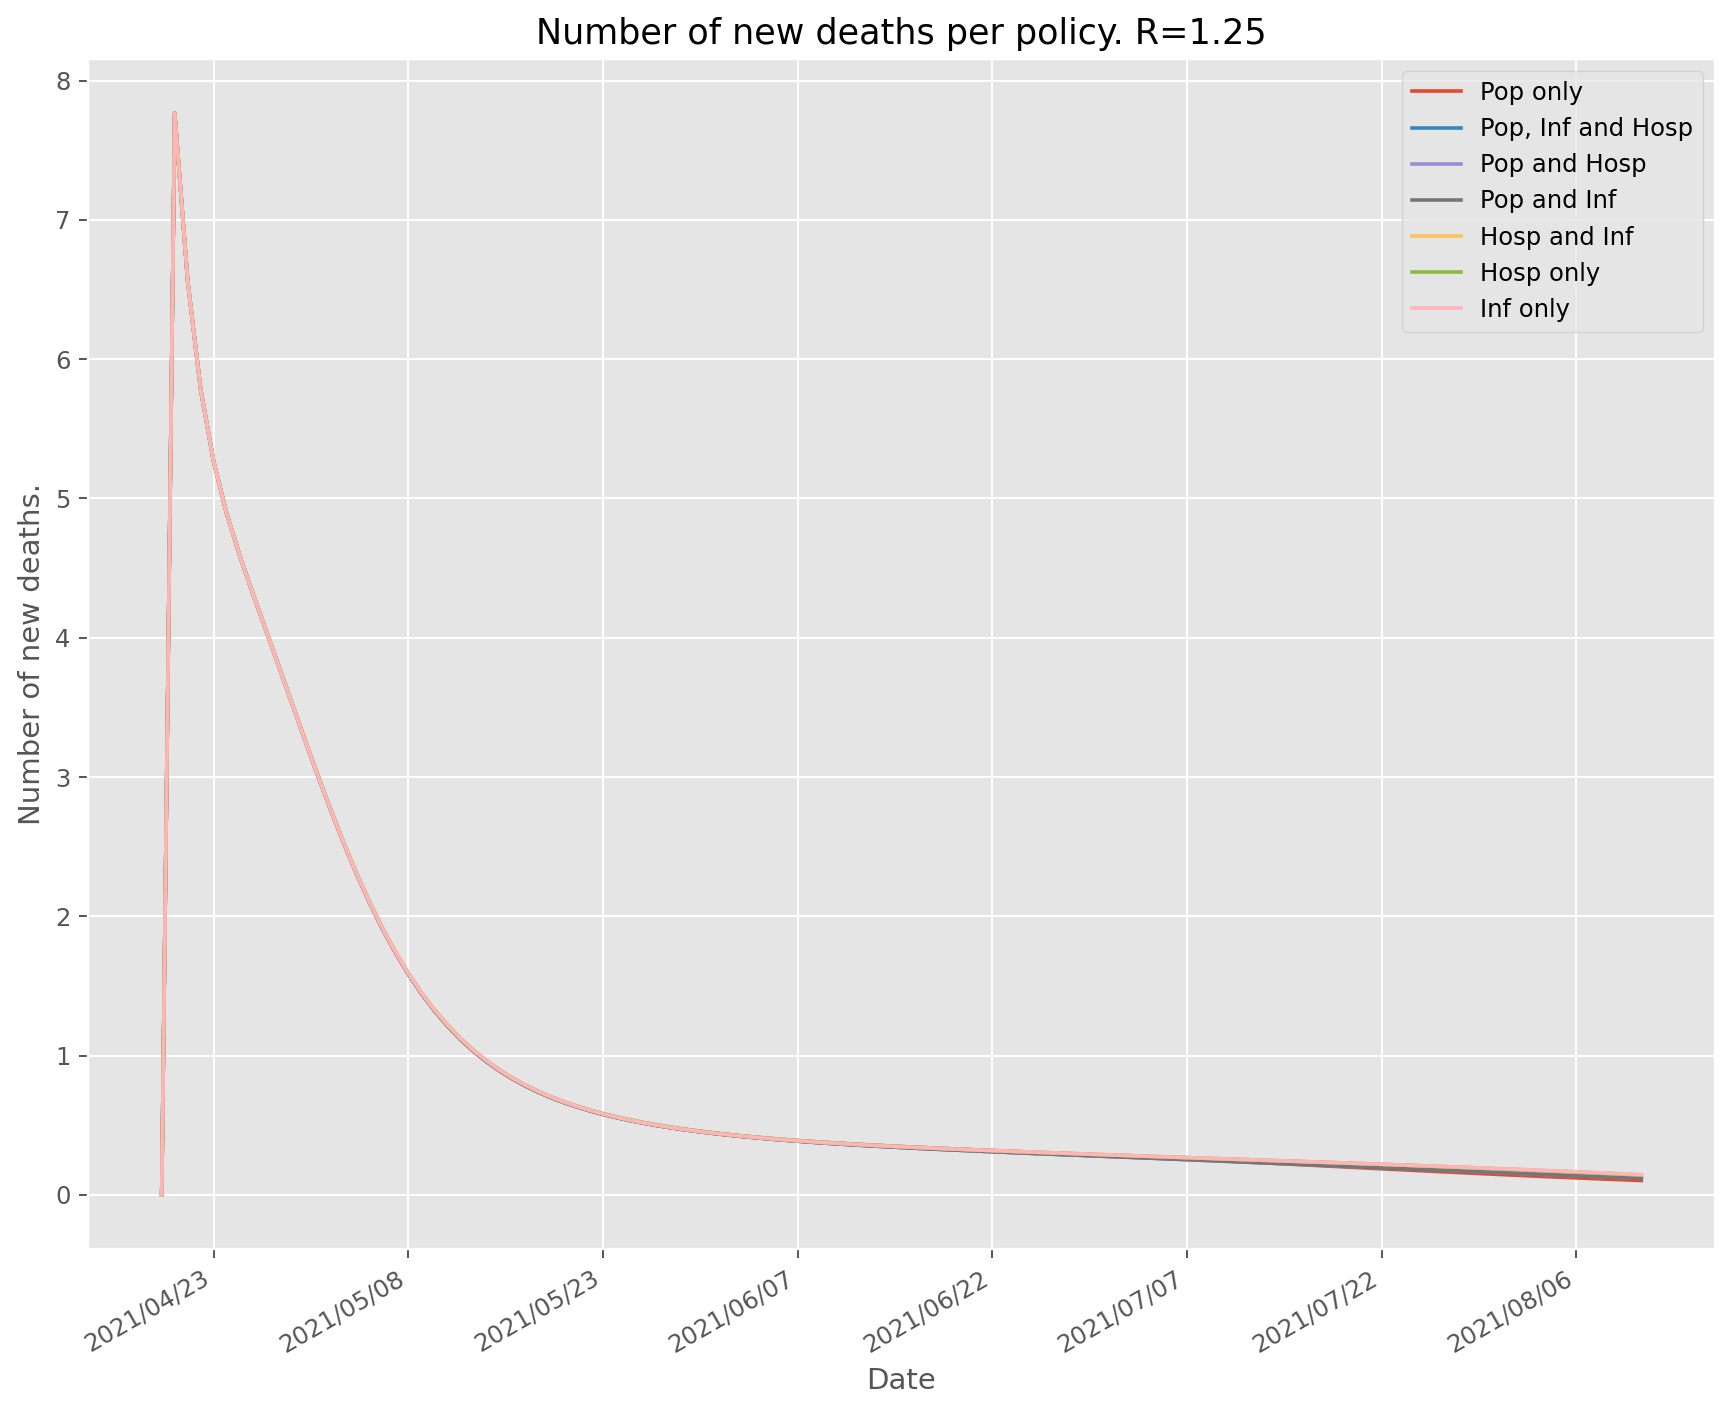

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 176.59627875092815
Pop and Inf: 179.24742112165097
Pop and Hosp: 179.527594338764
Pop, Inf and Hosp: 181.27964758052946
Hosp only: 186.74106276130848
Hosp and Inf: 186.7543654429175
Inf only: 187.09936750642606


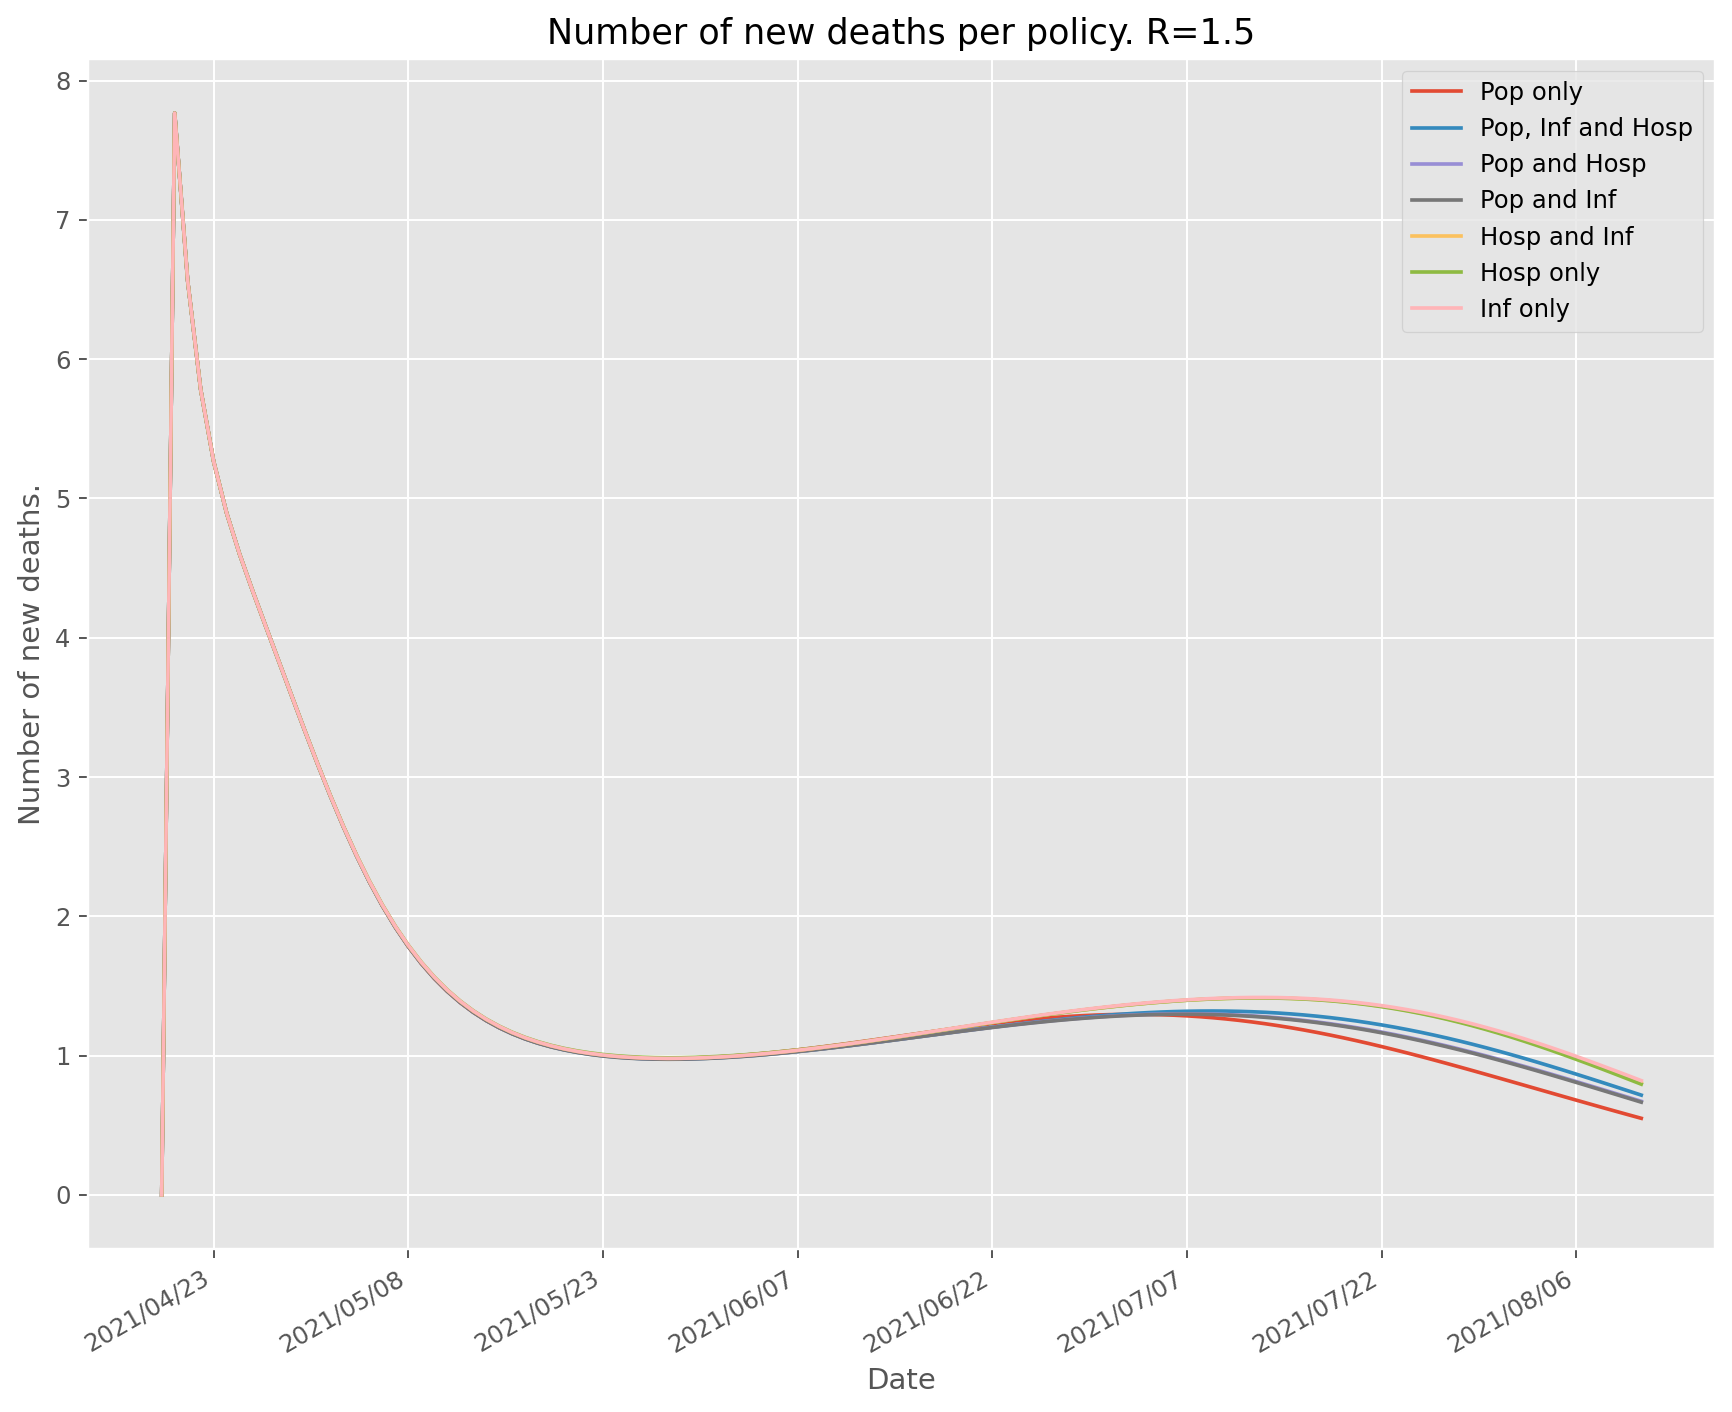

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 496.59421650098784
Pop and Inf: 513.0566241805149
Pop and Hosp: 514.2816693558046
Pop, Inf and Hosp: 522.0038256428023
Hosp only: 547.7743890782639
Hosp and Inf: 547.8205701981391
Inf only: 548.8690722888034


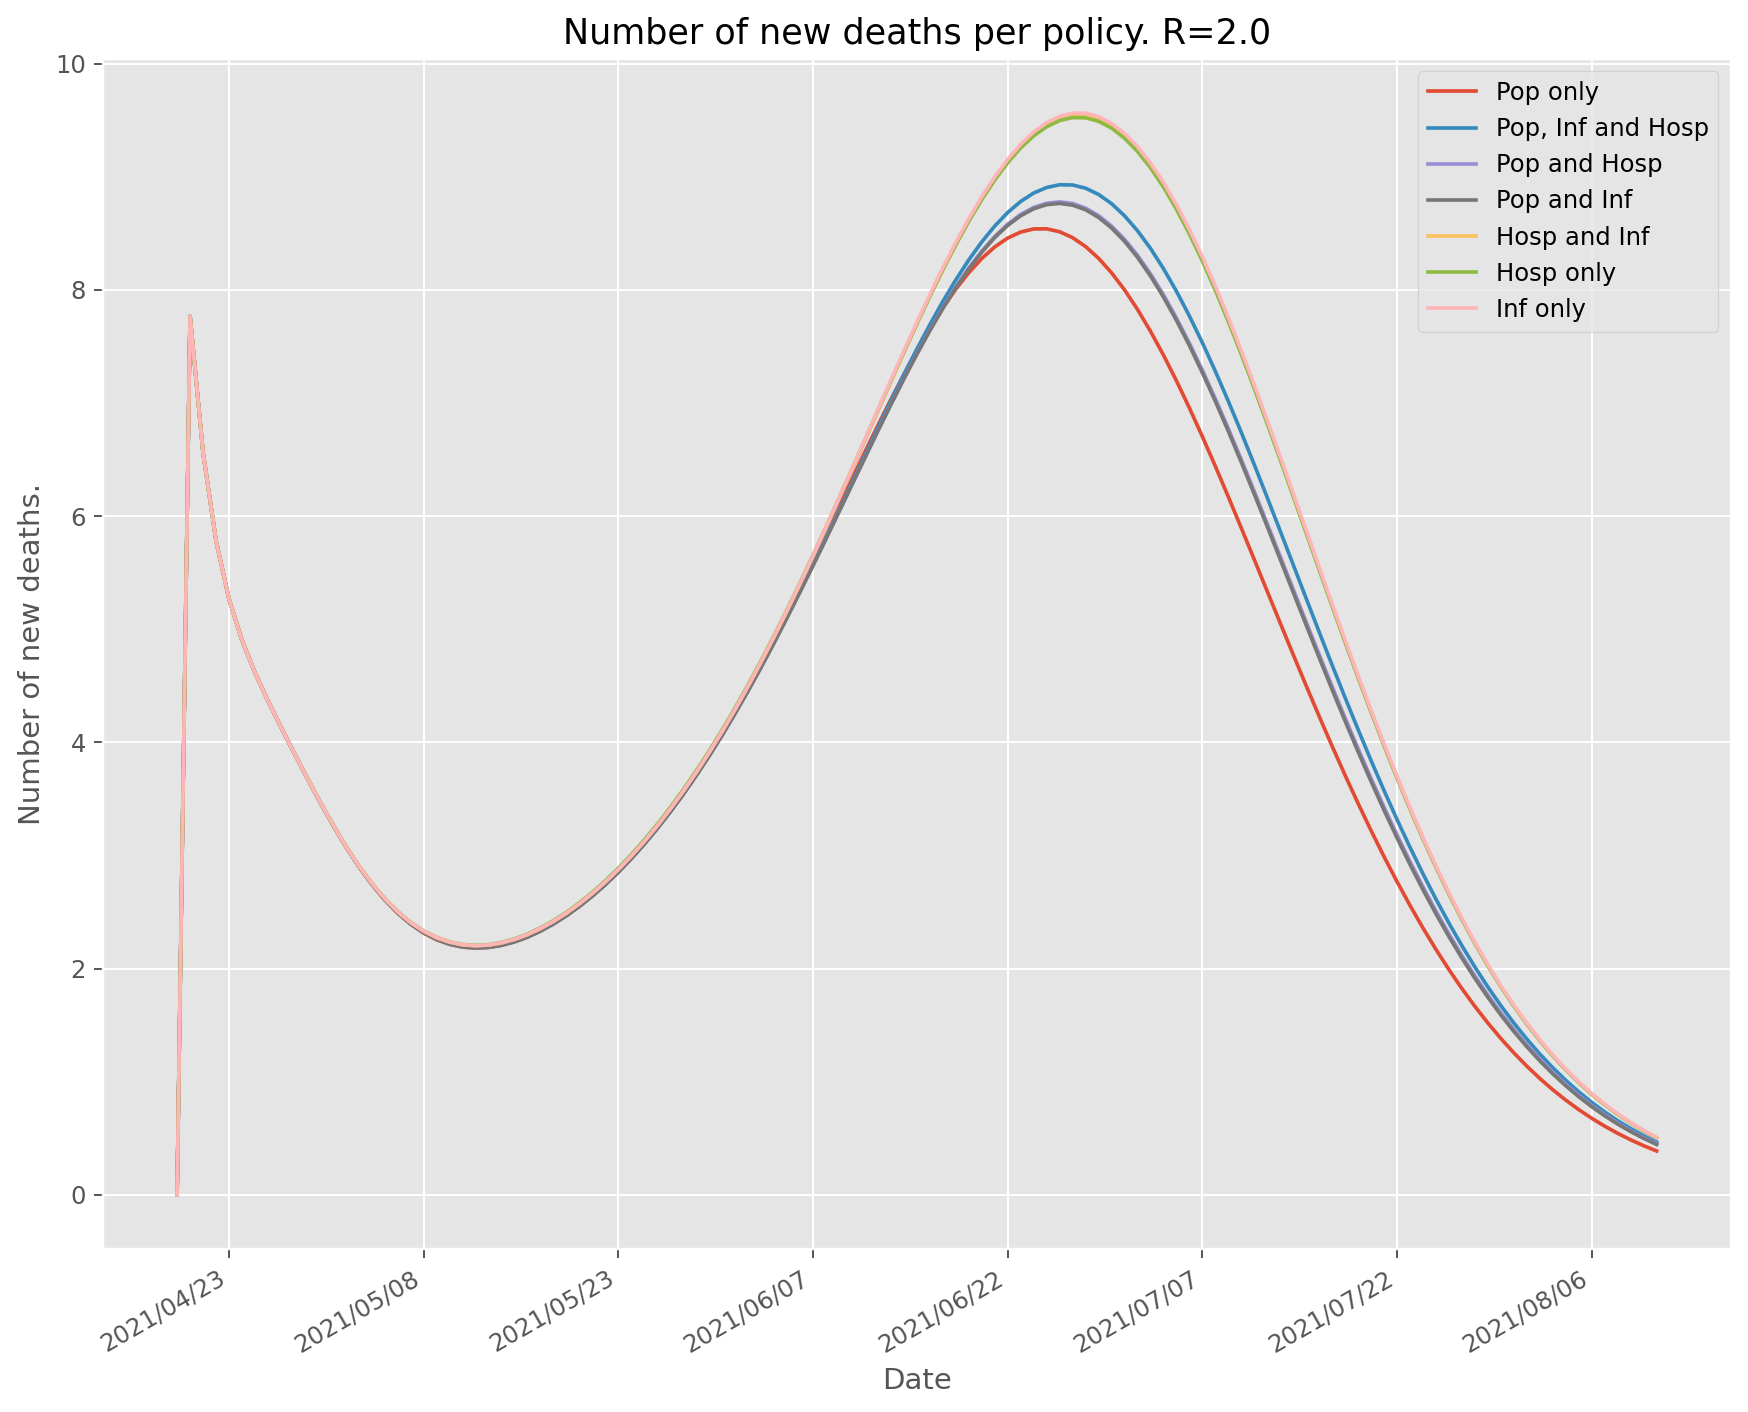

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Hospitalizations

Inf only: 7141.659399142011
Hosp and Inf: 7143.574407408708
Hosp only: 7149.408730372722
Pop, Inf and Hosp: 7155.745362200662
Pop and Inf: 7176.425891927405
Pop and Hosp: 7179.263414856868
Pop only: 7326.884694994059


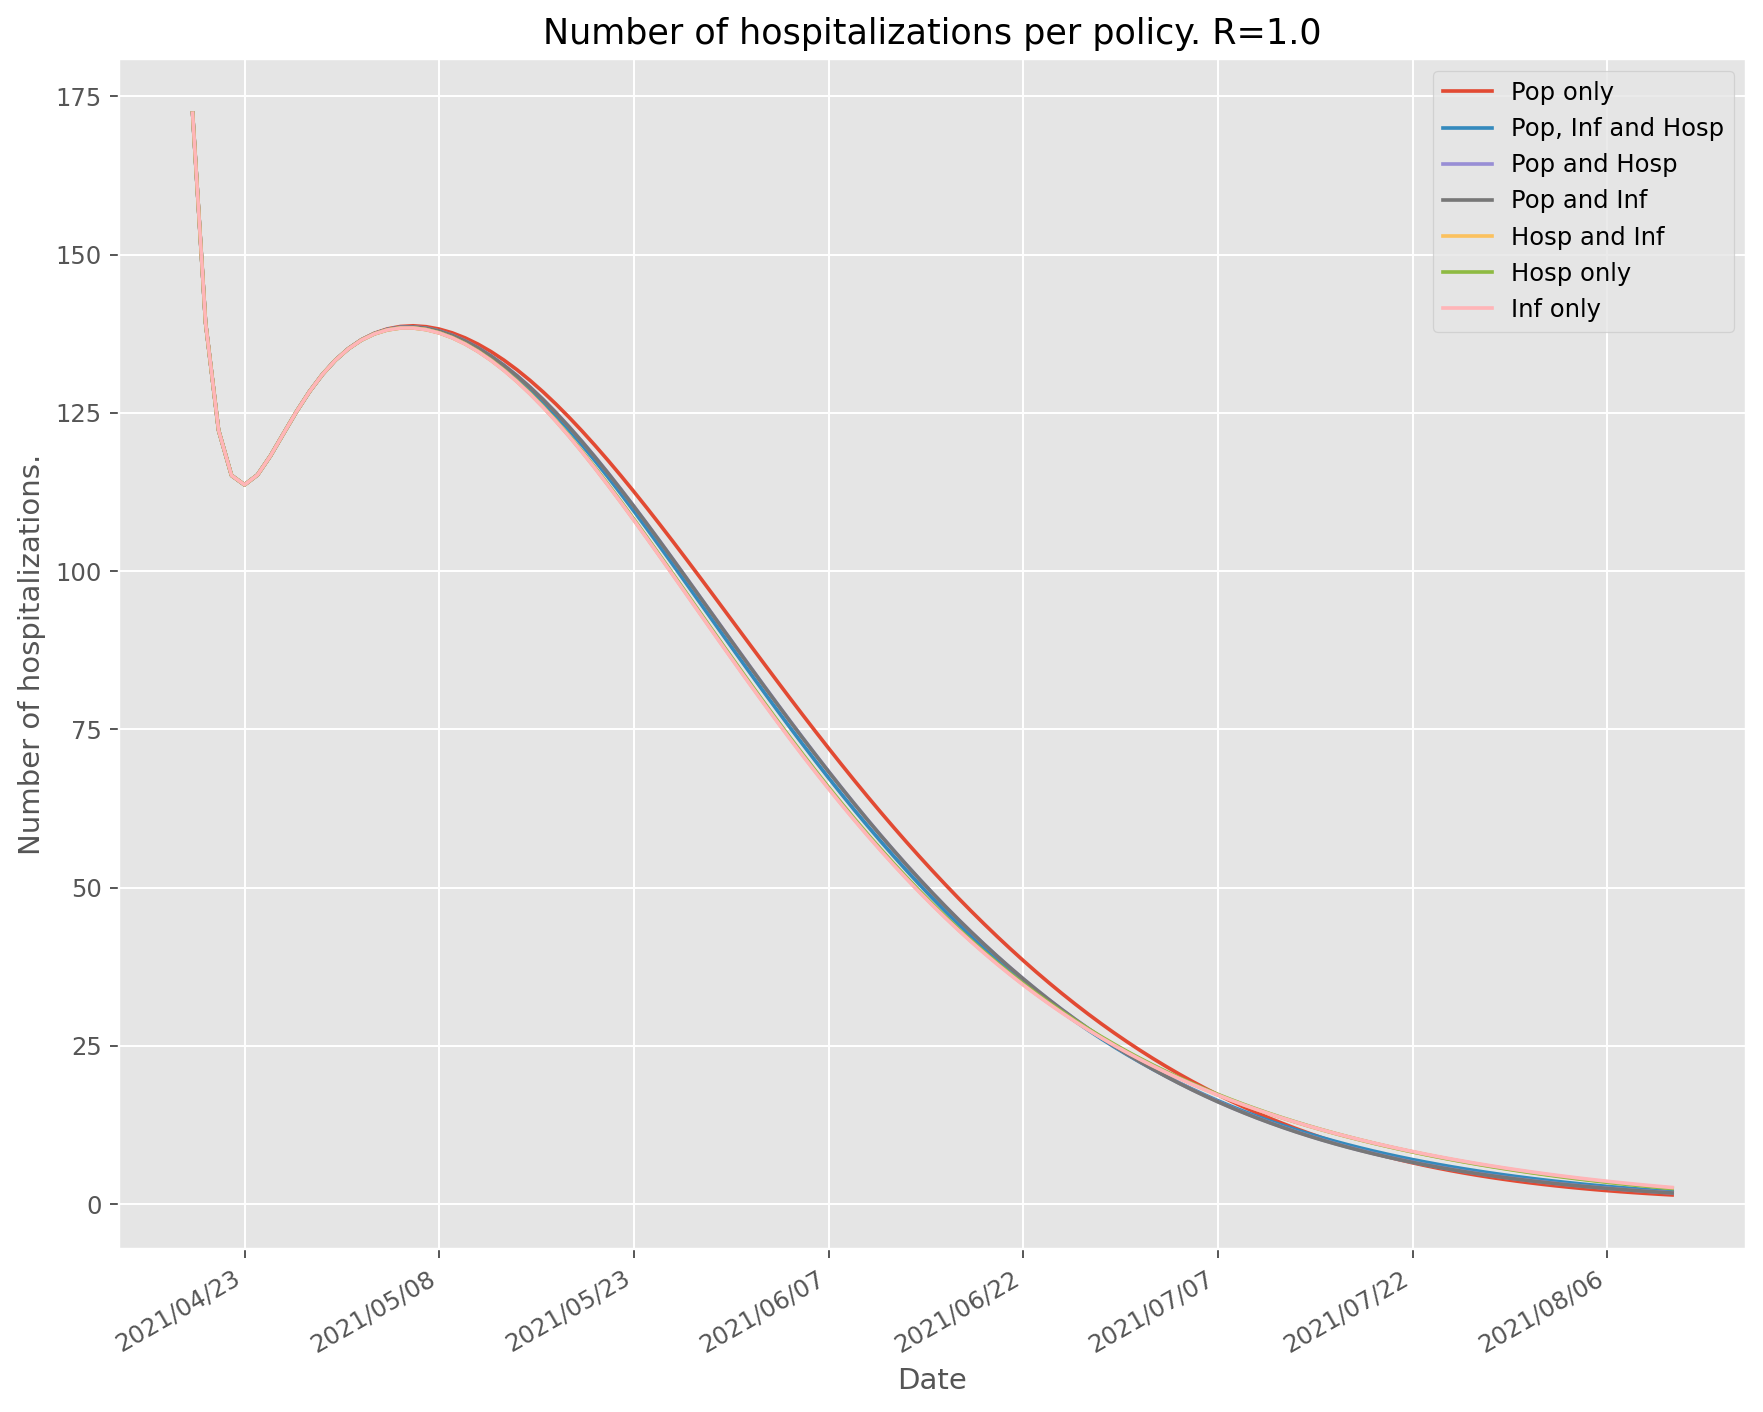

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 17577.95082563463
Pop and Hosp: 17598.971538569884
Pop, Inf and Hosp: 17680.758563165567
Pop only: 17946.605485499746
Hosp only: 18075.6313506977
Hosp and Inf: 18076.026912847716
Inf only: 18110.62744987632


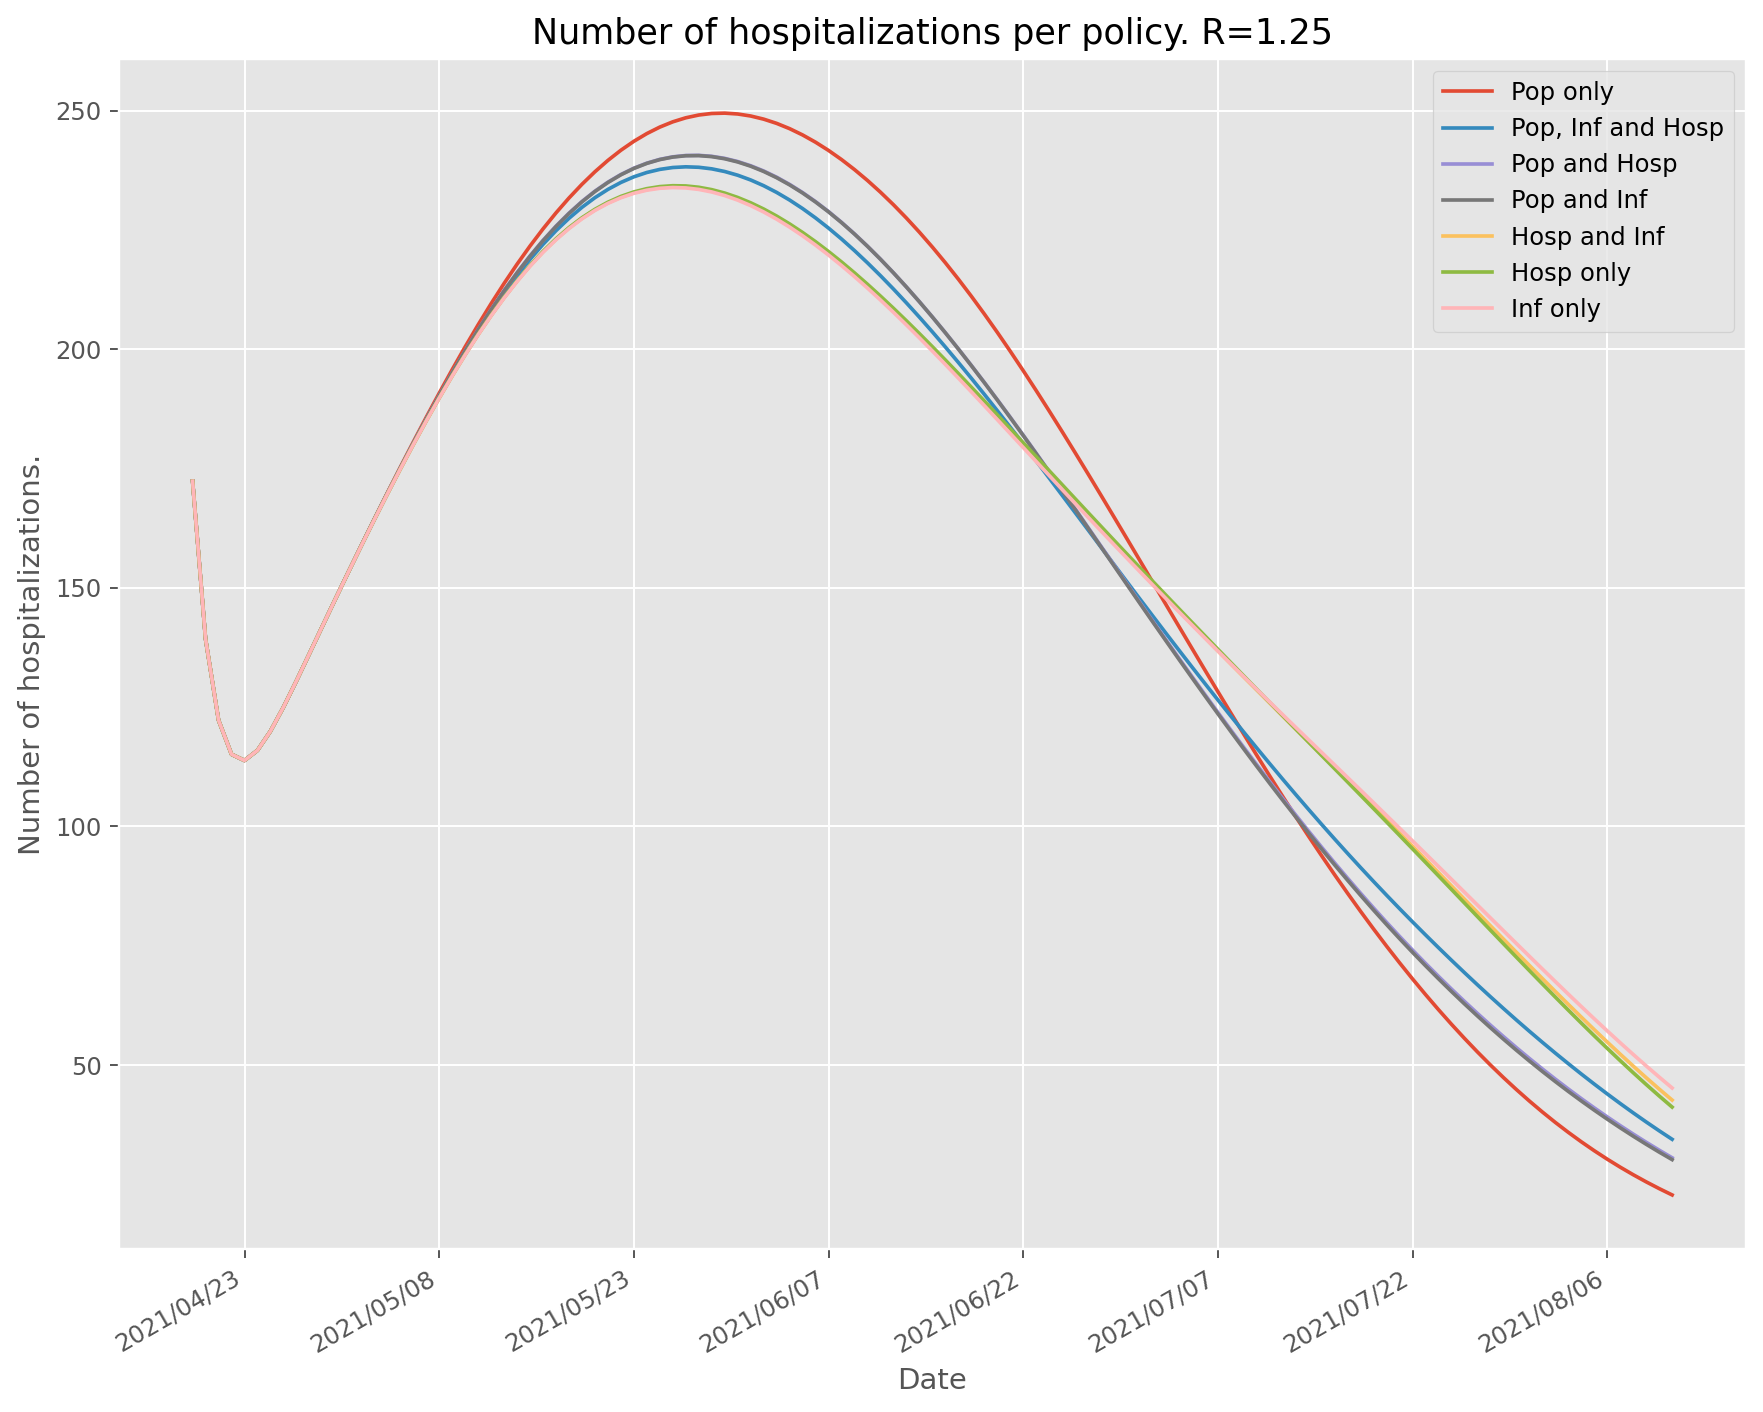

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 187864.294101147
Pop and Inf: 193888.641006927
Pop and Hosp: 194515.88783651526
Pop, Inf and Hosp: 198043.74624139757
Inf only: 208042.70116013702
Hosp and Inf: 208081.35832657566
Hosp only: 208391.19811690084


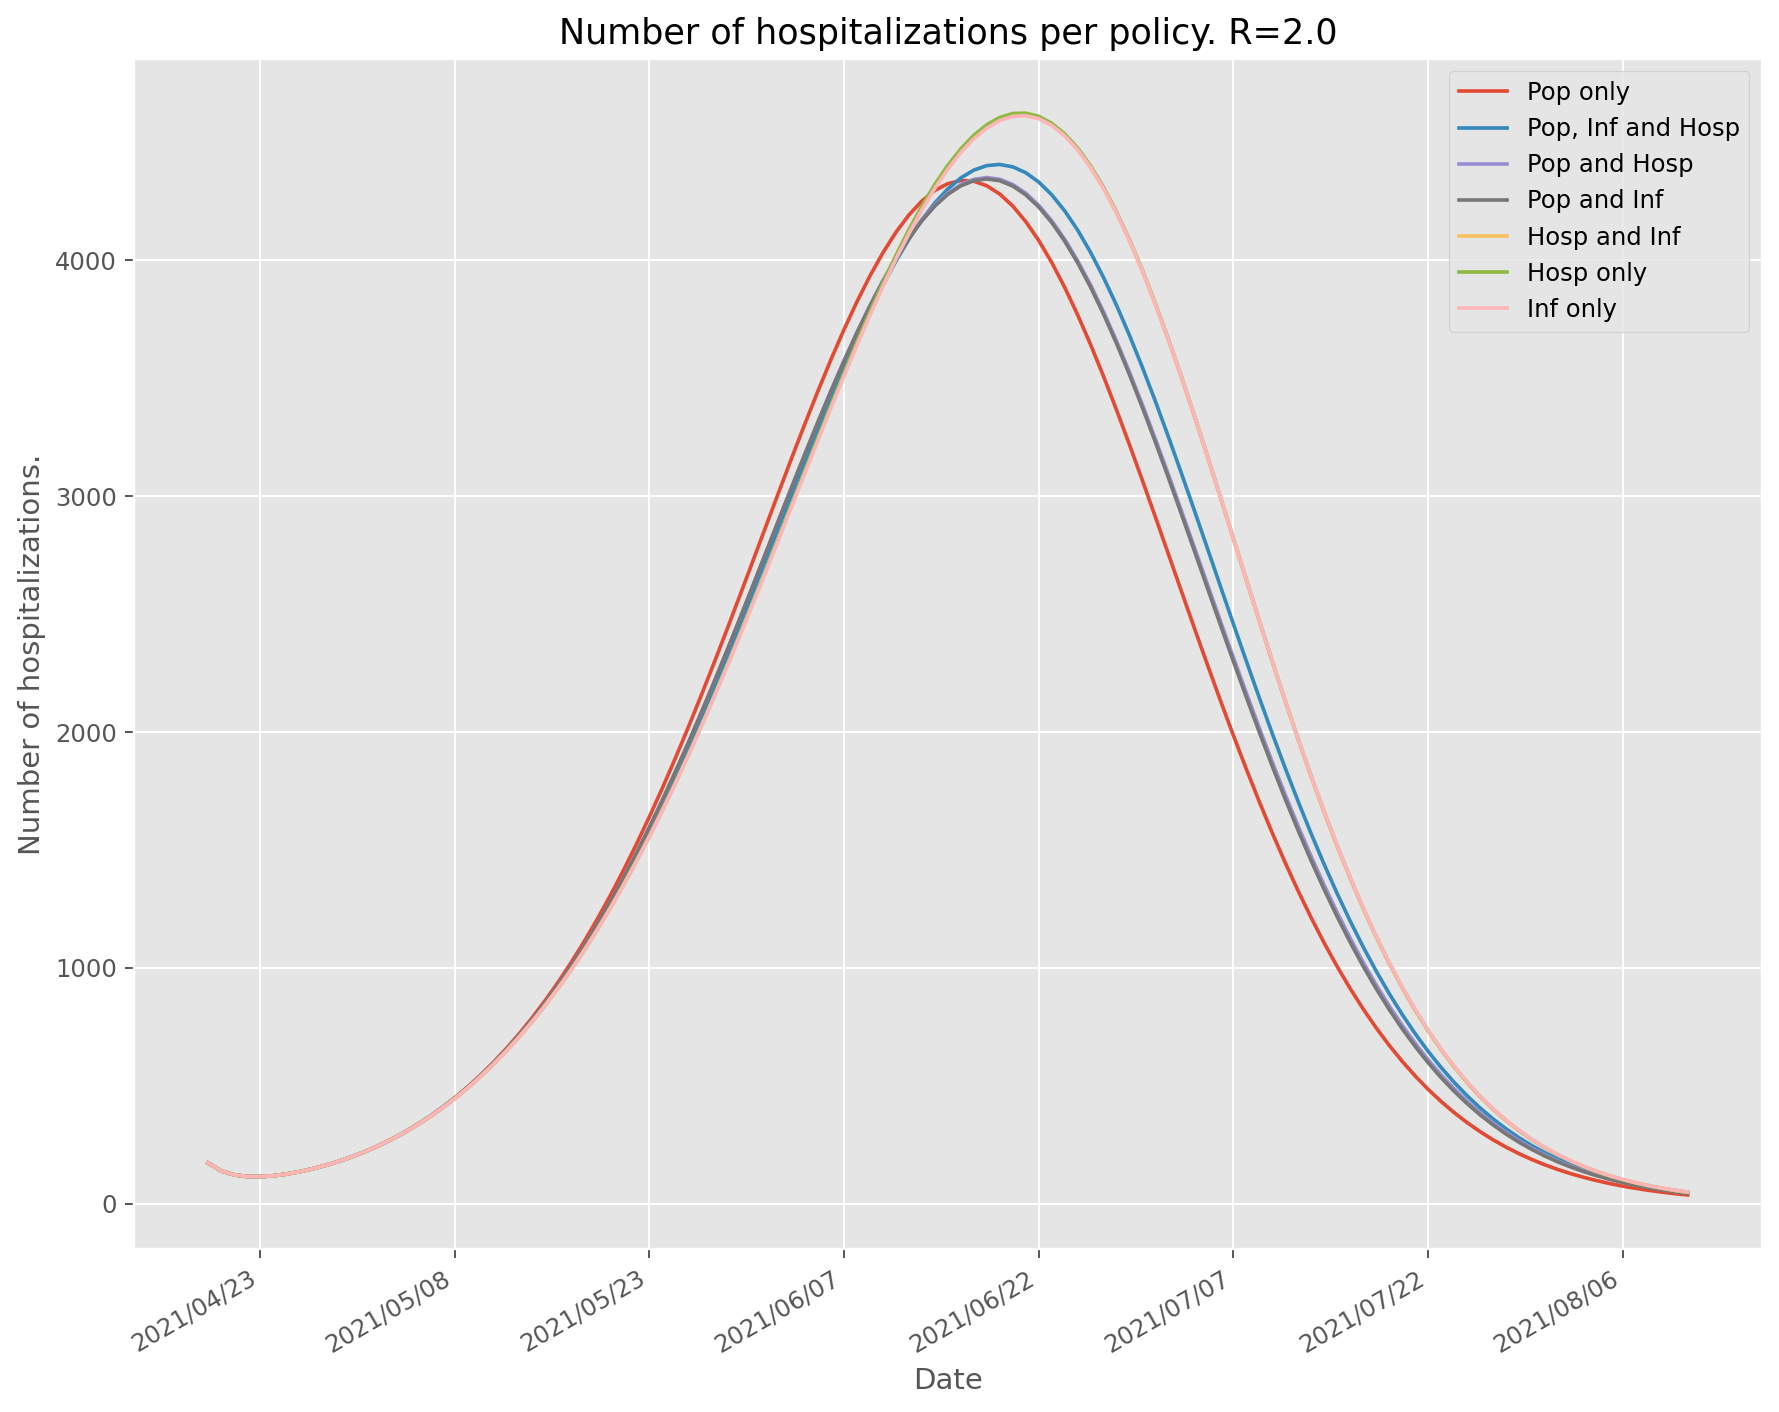

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Infections

Inf only: 189254.7574574367
Hosp and Inf: 189275.77770721135
Hosp only: 189305.73982601578
Pop, Inf and Hosp: 191245.7554975756
Pop and Hosp: 192315.54582028394
Pop and Inf: 192366.94397176825
Pop only: 196797.4640007659


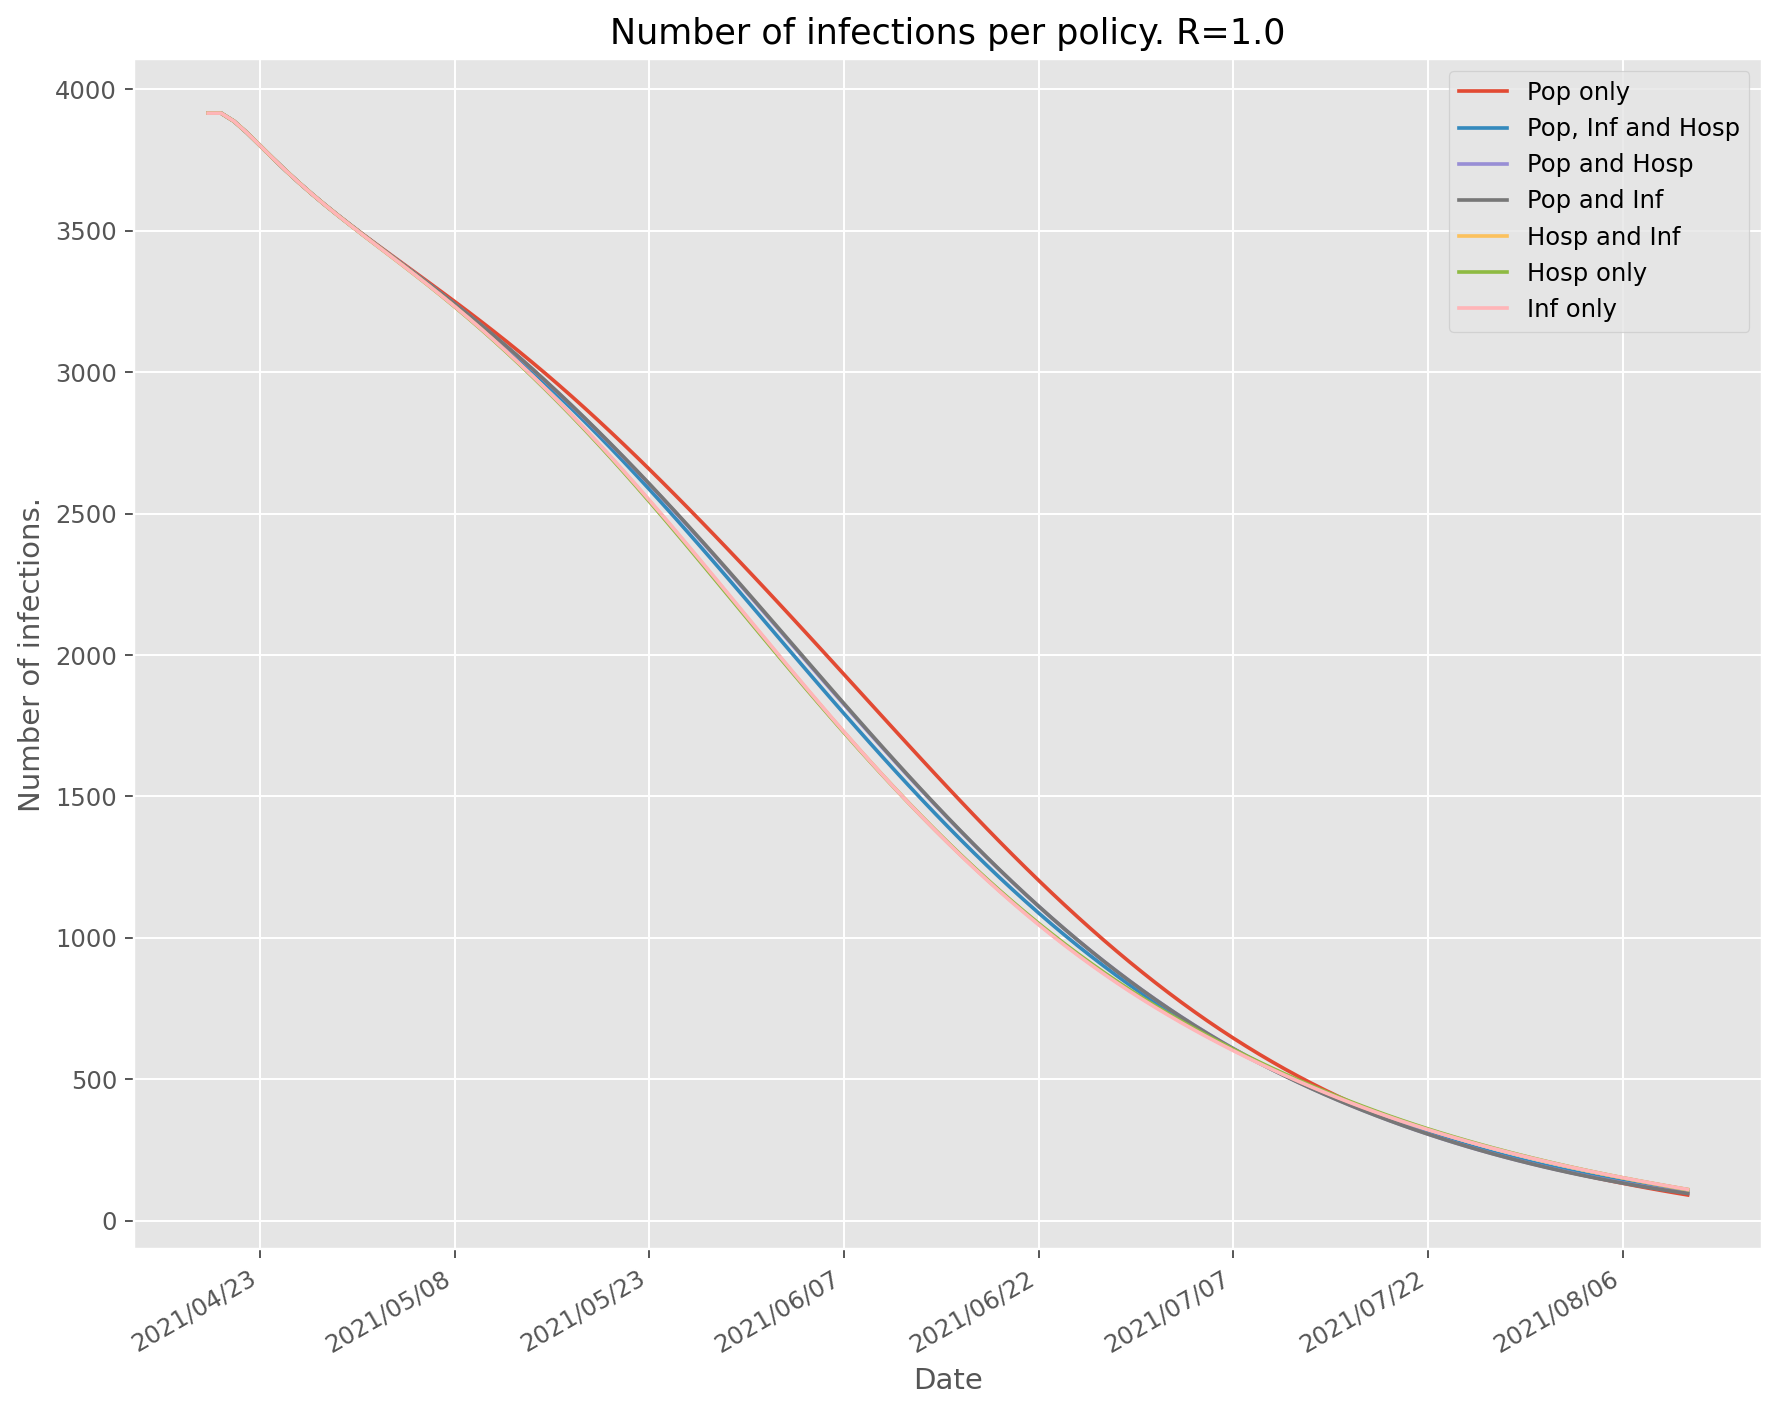

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 656666.6039955509
Hosp and Inf: 656766.5773761615
Hosp only: 657450.4694458025
Pop, Inf and Hosp: 658263.4151957241
Pop and Inf: 659071.7953221762
Pop and Hosp: 659584.7504746333
Pop only: 674285.4432015233


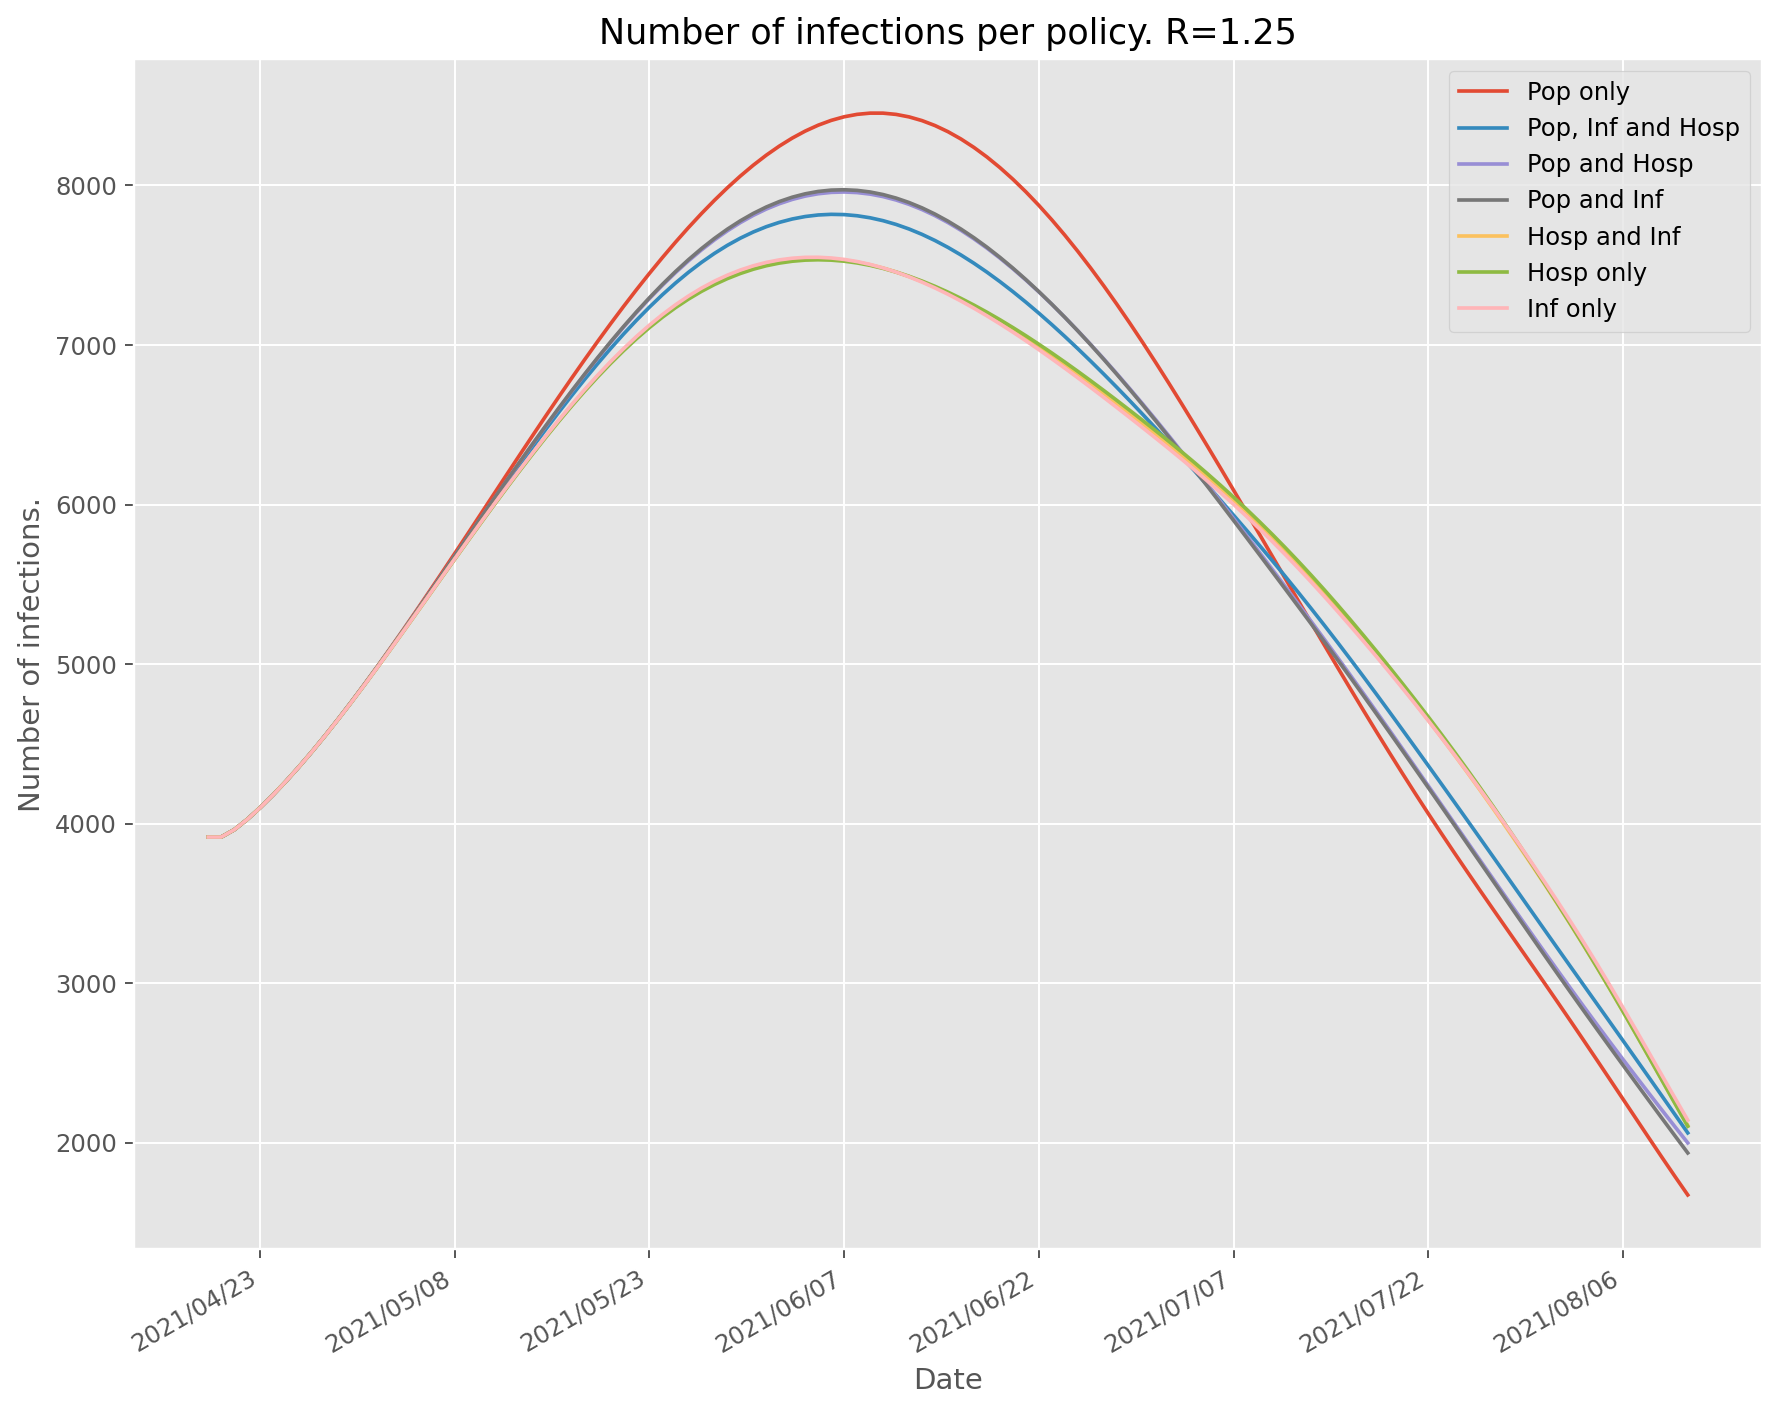

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 2241421.784794704
Pop and Inf: 2244491.2405970716
Pop and Hosp: 2249539.2046209383
Pop, Inf and Hosp: 2257951.6438403246
Hosp and Inf: 2274307.6377850613
Hosp only: 2274533.9958222867
Inf only: 2276995.9390919833


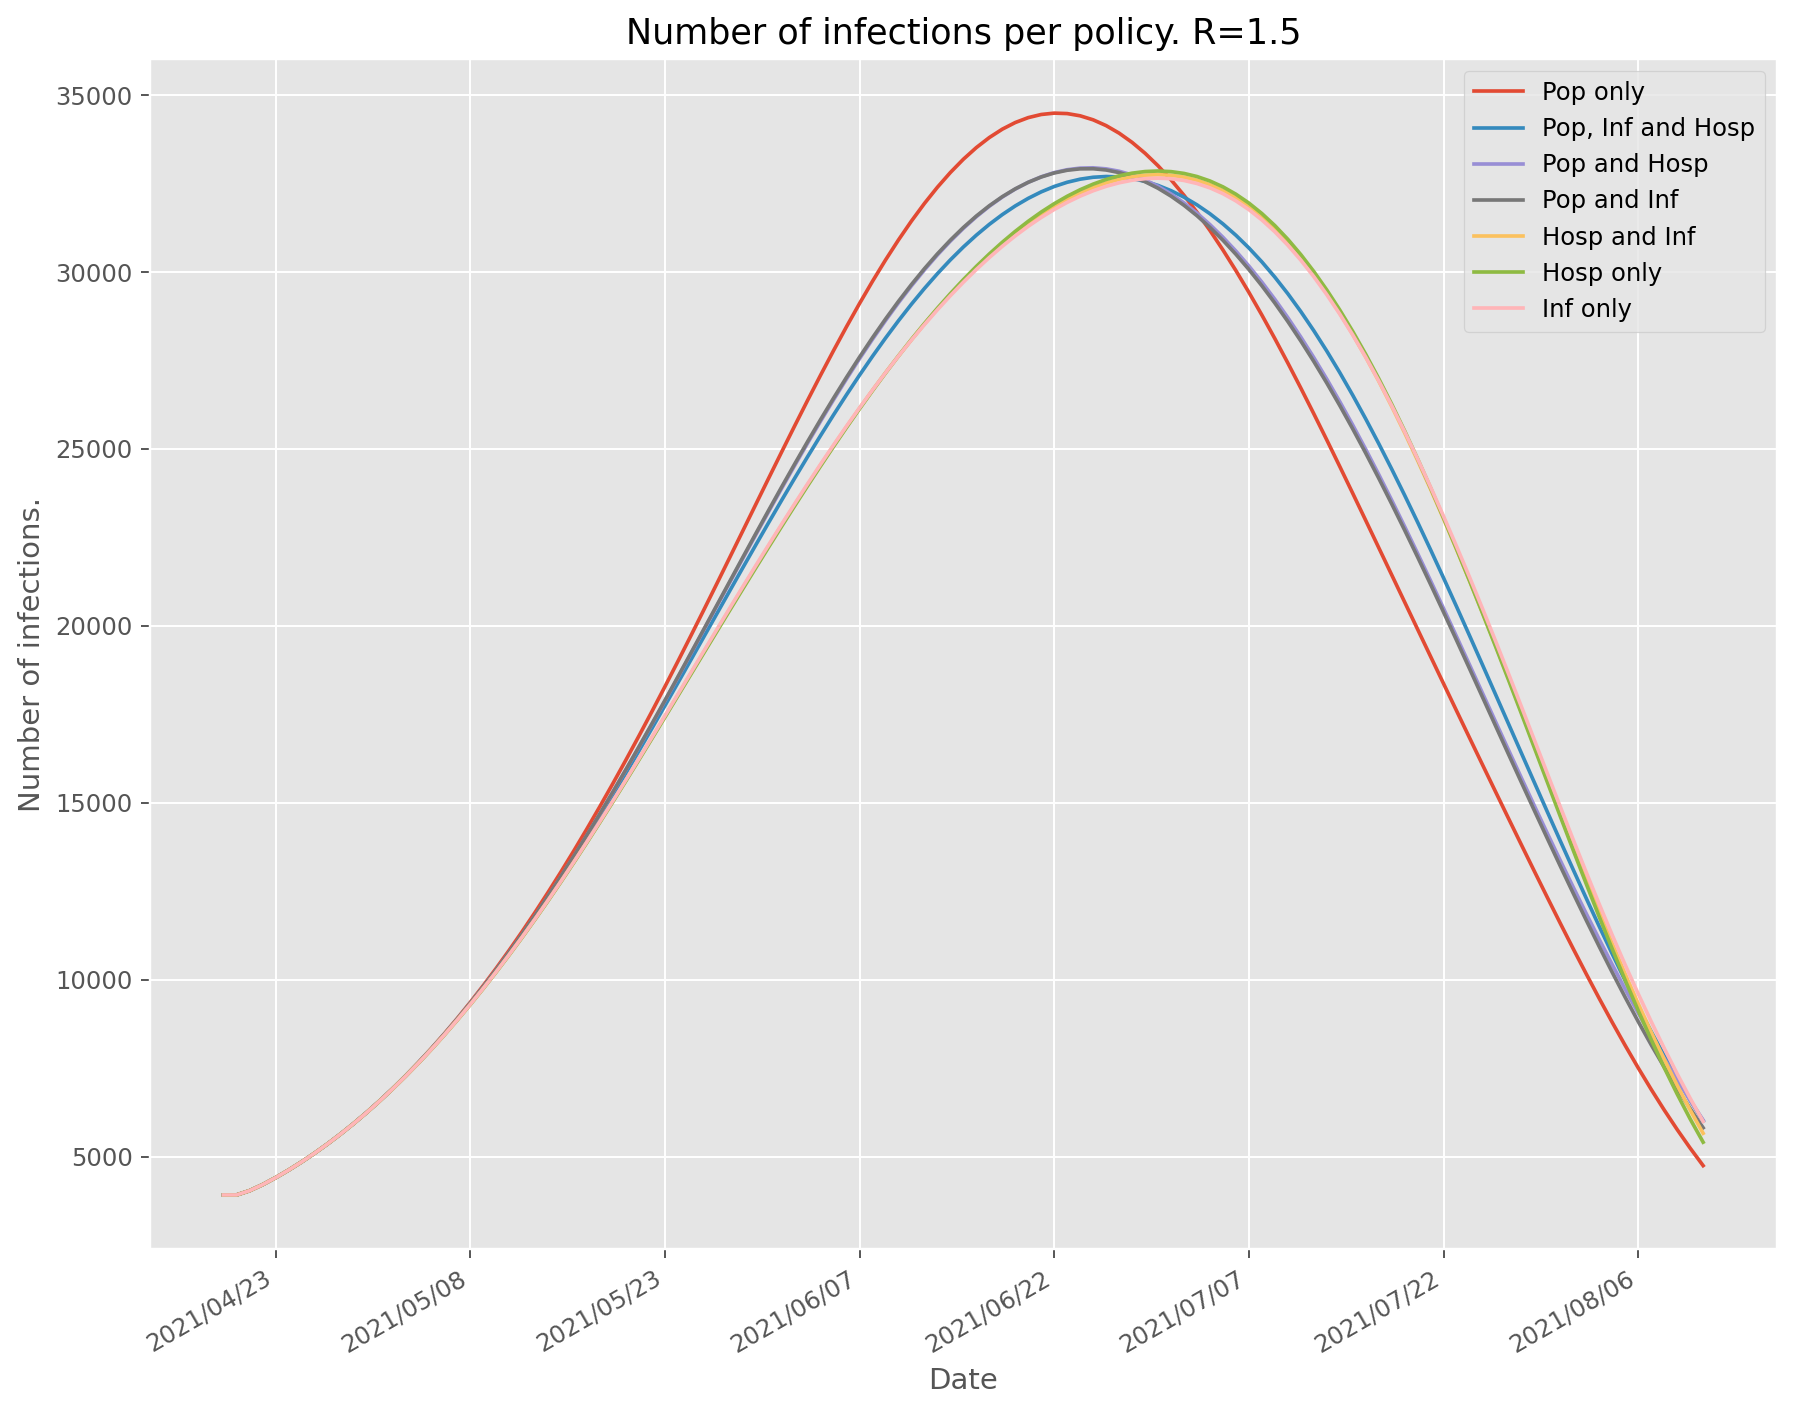

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 6722703.540250351
Pop and Inf: 6758975.9968816815
Pop and Hosp: 6768351.555523529
Pop, Inf and Hosp: 6773491.732184119
Inf only: 6774910.135618416
Hosp and Inf: 6779750.669306589
Hosp only: 6784933.970275692


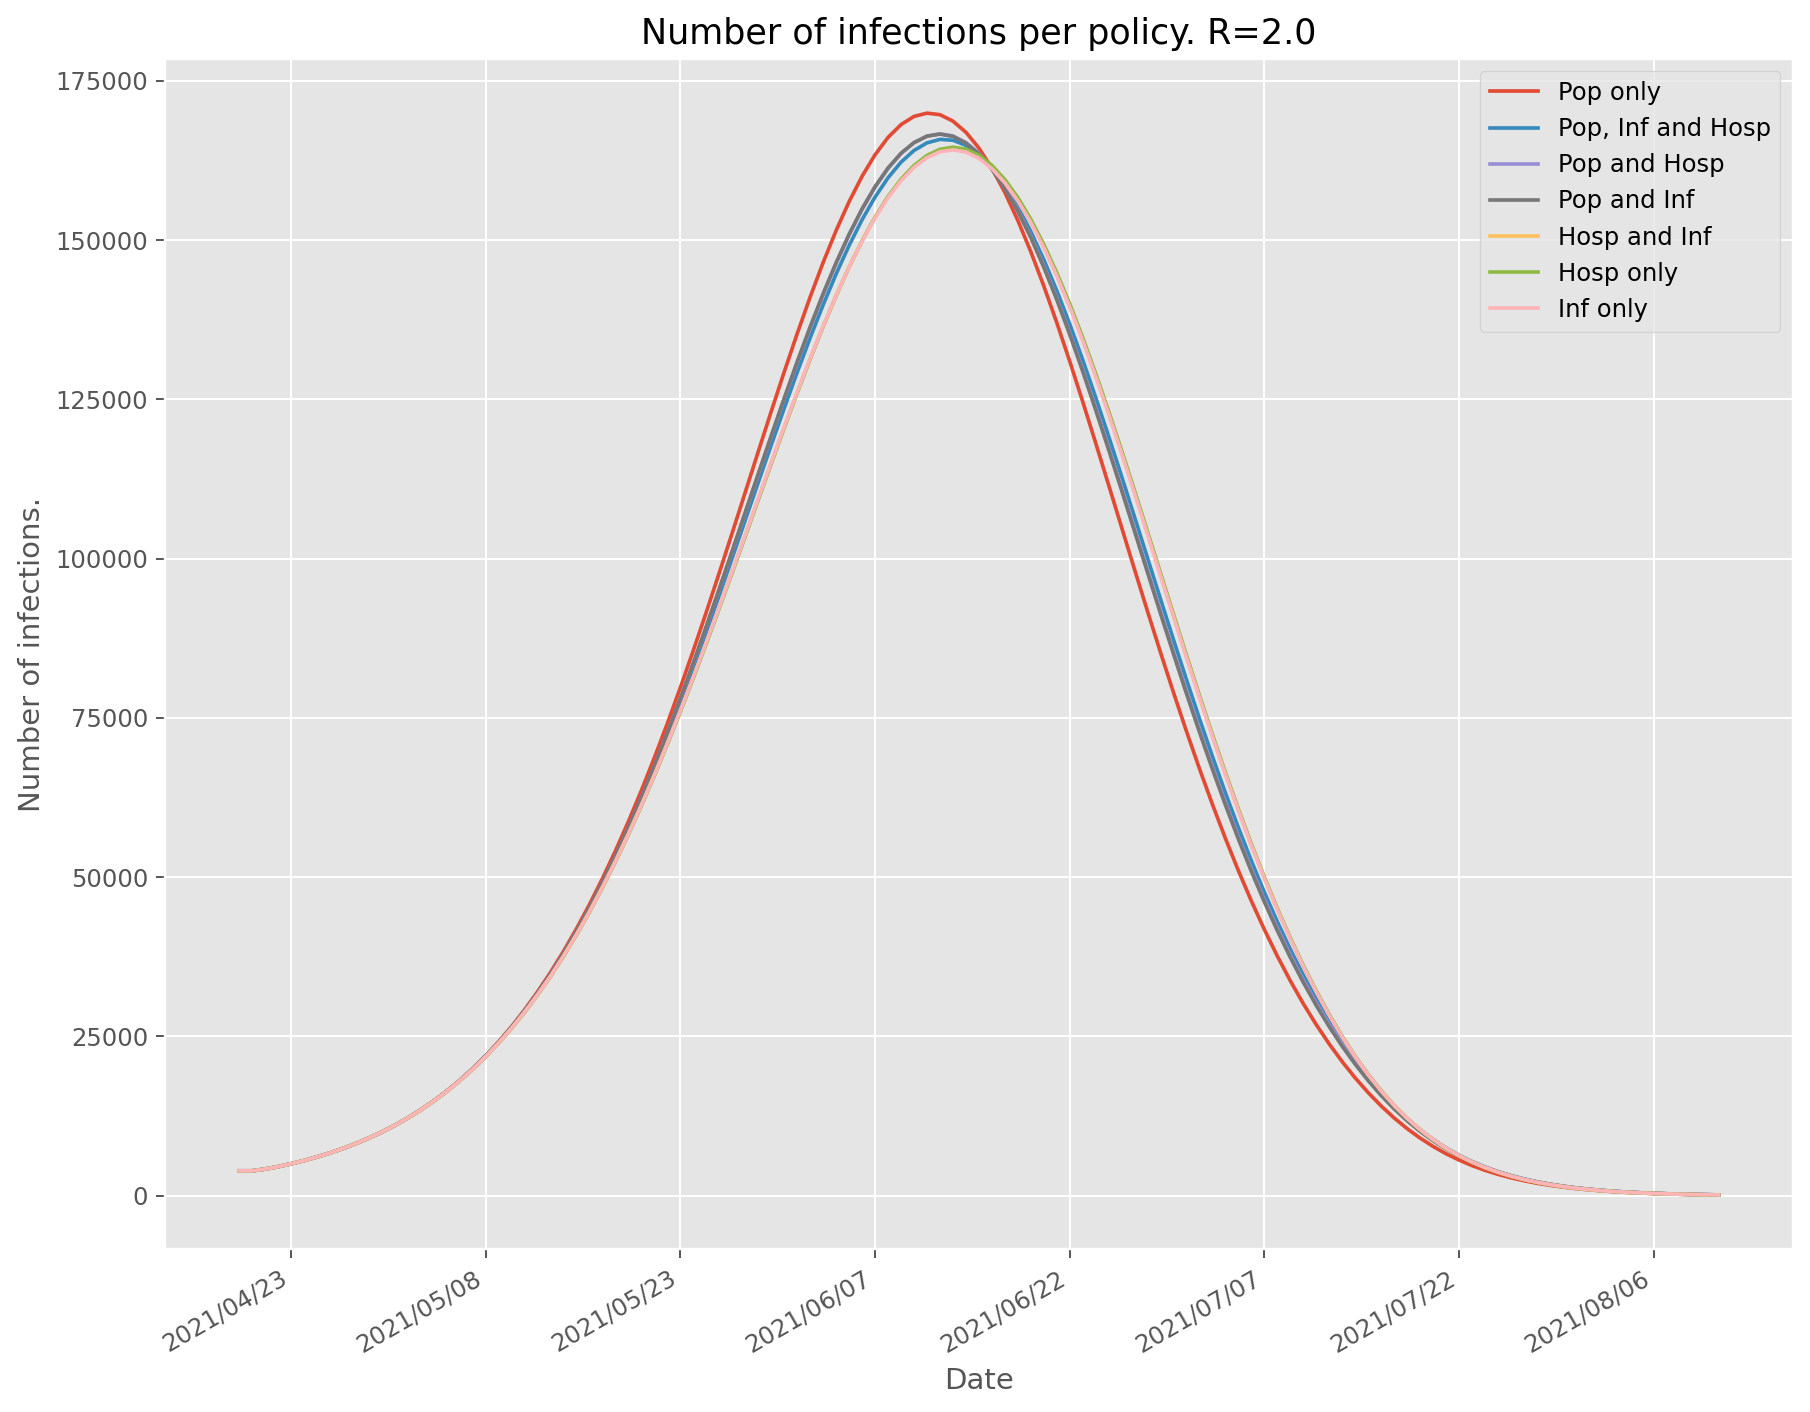

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()